# 통계모델링
###### 데이터사이언스학과
###### 2019010919
###### 손정락




## 필요한 패키지

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from scipy.stats import shapiro
from scipy.stats import ttest_rel
from scipy.stats import levene
from scipy.stats import wilcoxon
from statsmodels.stats.anova import anova_lm
from scipy.stats import f_oneway
from scipy.stats import kruskal
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats

## 데이터 불러오기

In [2]:
df3= pd.read_excel('/content/drive/MyDrive/통계모델링/2023_경쟁률.xlsx',header=[0,1])
df4= pd.read_excel('/content/drive/MyDrive/통계모델링/2024_경쟁률2.xlsx',header=[0,1])
df5= pd.read_excel('/content/drive/MyDrive/통계모델링/2025_경쟁률2.xlsx',header=[0,1])

## EDA(탐색적데이터분석)

In [3]:
df3['년도'] = '2023'
df4['년도'] = '2024'
df5['년도'] = '2025'

In [4]:
df3.columns = ['단과대학', '학과', '모집정원',
                  '정원내모집','정원내지원','정원내경쟁률',
                  '일반전형_모집','일반전형_지원','일반전형_경쟁률',
                  '교과우수_모집','교과우수_지원','교과우수_경쟁률',
                  '담임추천_모집','담임추천_지원','담임추천_경쟁률',
                  '창의면접_모집','창의면접_지원','창의면접_경쟁률',
                  '지역인재_모집','지역인재_지원','지역인재_경쟁률',
                  '국가보훈/지역기회균형_지원','국가보훈/지역기회균형_모집','국가보훈/지역기회균형_경쟁률',
                  '농어촌전형_모집','농어촌전형_지원',
                  '특성화고_모집','특성화고_지원',
                  '기회균형_모집','기회균형_지원',
                  '연도']

In [5]:
df4.columns = ['단과대학', '학과', '모집정원',
                  '정원내모집','정원내지원','정원내경쟁률',
                  '일반전형_모집','일반전형_지원','일반전형_경쟁률',
                  '교과우수_모집','교과우수_지원','교과우수_경쟁률',
                  '담임추천_모집','담임추천_지원','담임추천_경쟁률',
                  '창의면접_모집','창의면접_지원','창의면접_경쟁률',
                  '지역인재_모집','지역인재_지원','지역인재_경쟁률',
                  '국가보훈/지역기회균형_지원','국가보훈/지역기회균형_모집','국가보훈/지역기회균형_경쟁률',
                  '농어촌전형_모집','농어촌전형_지원',
                  '특성화고_모집','특성화고_지원',
                  '기회균형_모집','기회균형_지원',
                  '연도']

In [6]:
df5.columns = ['단과대학', '학과', '모집정원',
                  '정원내모집','정원내지원','정원내경쟁률',
                  '일반전형_모집','일반전형_지원','일반전형_경쟁률',
                  '교과우수_모집','교과우수_지원','교과우수_경쟁률',
                  '담임추천_모집','담임추천_지원','담임추천_경쟁률',
                  '창의면접_모집','창의면접_지원','창의면접_경쟁률',
                  '지역인재_모집','지역인재_지원','지역인재_경쟁률',
                  '국가보훈/지역기회균형_지원','국가보훈/지역기회균형_모집','국가보훈/지역기회균형_경쟁률',
                  '농어촌전형_모집','농어촌전형_지원',
                  '특성화고_모집','특성화고_지원',
                  '기회균형_모집','기회균형_지원',
                  '연도']

In [7]:
print(df3.describe())
print()
print(df3.info())

              모집정원        정원내모집        정원내지원     정원내경쟁률     일반전형_모집  \
count    53.000000    53.000000    53.000000  53.000000   53.000000   
mean    170.037736   167.622642   686.464906   4.455369   50.415094   
std     433.544957   430.675374  1763.896859   1.826231  129.350810   
min      30.000000    27.000000     3.320000   0.000000    0.000000   
25%      40.000000    36.000000   122.000000   3.190000   11.000000   
50%      47.000000    43.000000   217.000000   4.090000   14.000000   
75%      66.000000    66.000000   295.000000   5.480000   23.000000   
max    2325.000000  2460.000000  9097.320000   8.530000  668.000000   

           일반전형_지원   일반전형_경쟁률     교과우수_모집      교과우수_지원   교과우수_경쟁률  ...  \
count    53.000000  53.000000   53.000000    53.000000  53.000000  ...   
mean    269.283019   5.148008   30.566038   133.509434   3.268109  ...   
std     696.121933   2.115537   79.283209   346.690431   2.243214  ...   
min       0.000000   0.000000    0.000000     0.000000   0.00000

In [8]:
print(df4.describe())
print()
print(df4.info())

              모집정원        정원내모집        정원내지원     정원내경쟁률     일반전형_모집  \
count    53.000000    53.000000    53.000000  53.000000   53.000000   
mean    167.735849   154.754717   658.264151   4.250690   59.622642   
std     427.797766   394.661632  1685.286328   1.624396  152.431728   
min      30.000000    27.000000    60.000000   1.764706    0.000000   
25%      40.000000    37.000000   146.000000   3.260870   15.000000   
50%      46.000000    42.000000   181.000000   3.945946   17.000000   
75%      65.000000    64.000000   293.000000   4.809524   26.000000   
max    2294.000000  2122.000000  8973.000000  12.378378  790.000000   

           일반전형_지원    일반전형_경쟁률     교과우수_모집      교과우수_지원    교과우수_경쟁률  ...  \
count    53.000000   53.000000   53.000000    53.000000   53.000000  ...   
mean    199.219983    8.362313   23.320755    66.043739    5.444816  ...   
std     522.051586   27.751746   59.942528   168.728876   18.149998  ...   
min       0.000000    0.000000    0.000000     0.000000 

In [9]:
print(df5.describe())
print()
print(df5.info())

              모집정원        정원내모집        정원내지원     정원내경쟁률     일반전형_모집  \
count    53.000000    53.000000    53.000000  53.000000   53.000000   
mean    164.264151   148.132075   706.962264   4.805566   49.358491   
std     419.242777   371.474300  1791.942703   1.841618  126.124800   
min      30.000000    27.000000    91.000000   2.552448    0.000000   
25%      40.000000    37.000000   146.000000   3.702703   12.000000   
50%      45.000000    41.000000   201.000000   4.405405   15.000000   
75%      65.000000    60.000000   326.000000   5.333333   20.000000   
max    2248.000000  1927.000000  9276.000000  13.148148  654.000000   

           일반전형_지원   일반전형_경쟁률     교과우수_모집      교과우수_지원   교과우수_경쟁률  ...  \
count    53.000000  53.000000   53.000000    53.000000  53.000000  ...   
mean    315.641509   6.082919   27.849057   107.018868   3.016025  ...   
std     829.372796   3.119902   71.980338   276.141372   1.910324  ...   
min       0.000000   0.000000    0.000000     0.000000   0.00000

## 한국어설정

In [10]:
from matplotlib import font_manager, rc

In [11]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
#한글설치

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [12]:
import matplotlib.font_manager as fm

# 설치된 폰트 출력
font_list = [font.name for font in fm.fontManager.ttflist]
font_list

['STIXSizeThreeSym',
 'STIXSizeOneSym',
 'DejaVu Sans Mono',
 'cmss10',
 'STIXSizeOneSym',
 'DejaVu Serif',
 'STIXGeneral',
 'DejaVu Serif',
 'cmr10',
 'DejaVu Serif',
 'cmex10',
 'STIXSizeTwoSym',
 'DejaVu Sans Mono',
 'DejaVu Sans',
 'STIXGeneral',
 'STIXGeneral',
 'DejaVu Serif Display',
 'STIXGeneral',
 'DejaVu Sans Mono',
 'DejaVu Sans',
 'cmsy10',
 'STIXNonUnicode',
 'STIXSizeThreeSym',
 'DejaVu Serif',
 'STIXSizeFourSym',
 'STIXSizeTwoSym',
 'DejaVu Sans',
 'STIXNonUnicode',
 'DejaVu Sans',
 'cmmi10',
 'DejaVu Sans Display',
 'cmtt10',
 'STIXSizeFourSym',
 'STIXNonUnicode',
 'cmb10',
 'STIXSizeFiveSym',
 'DejaVu Sans Mono',
 'STIXNonUnicode',
 'NanumGothicCoding',
 'NanumGothic',
 'NanumMyeongjo',
 'Liberation Sans Narrow',
 'NanumSquareRound',
 'Liberation Mono',
 'Liberation Sans',
 'Liberation Sans Narrow',
 'NanumSquareRound',
 'Liberation Mono',
 'Liberation Sans Narrow',
 'NanumBarunGothic',
 'NanumSquare',
 'Liberation Serif',
 'Humor Sans',
 'NanumGothic',
 'Liberation S

## 연도별 모집 및 지원

In [13]:
target1 = pd.concat([df3, df4,df5])[['단과대학','정원내모집','정원내지원','정원내경쟁률','연도']]
target1 = target1[target1['단과대학']=='계']
target1.iloc[2,3] = 4.80
target1.iloc[0,2] = 9097
print(target1)
print()

ss = pd.DataFrame(index=range(6), columns=['구분', '인원','연도'])
ss['구분'] = ['모집' if i < 3 else '지원' for i in range(6)]
ss.loc[:2, '인원'] = target1['정원내모집'].values
ss.loc[3:, '인원'] = target1['정원내지원'].values
ss['연도'] = [2023,2024,2025,2023,2024,2025]
print(ss)

   단과대학  정원내모집   정원내지원  정원내경쟁률    연도
46    계   2460  9097.0  4.5625  2023
46    계   2122  8973.0  4.2800  2024
46    계   1927  9276.0  4.8000  2025

   구분      인원    연도
0  모집    2460  2023
1  모집    2122  2024
2  모집    1927  2025
3  지원  9097.0  2023
4  지원  8973.0  2024
5  지원  9276.0  2025


<ipython-input-14-71605c166a26>:22: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  plt.tight_layout()
<ipython-input-14-71605c166a26>:22: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  plt.tight_layout()
<ipython-input-14-71605c166a26>:22: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  plt.tight_layout()
<ipython-input-14-71605c166a26>:22: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: User

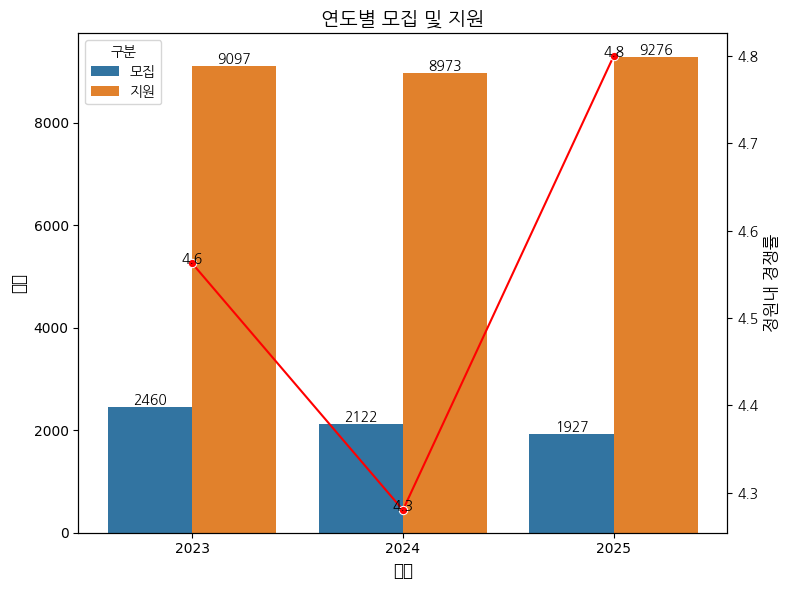

In [14]:
fig, ax1 = plt.subplots(figsize=(8, 6))

plt.rc('font', family='NanumGothic')

sns.barplot(x='연도', y='인원', data=ss, hue='구분', ax=ax1)
for container in ax1.containers:
    ax1.bar_label(container, fmt='%.0f', label_type='edge', fontsize=10)

ax1.set_ylabel('인원', fontsize=12)
ax1.set_xlabel('연도', fontsize=12)

ax2 = ax1.twinx()

sns.lineplot(x='연도', y='정원내경쟁률', data=target1, color='red', marker='o')
for i, value in enumerate(target1['정원내경쟁률']):
  ax2.text(x=i, y=value, s=f'{value:.1f}', ha='center', fontsize=10)
  ax2.set_ylabel('정원내 경쟁률', fontsize=12)
# ax2.tick_params(axis='y', labelcolor='red')

plt.title('연도별 모집 및 지원', fontsize=14)

plt.tight_layout()
plt.show()

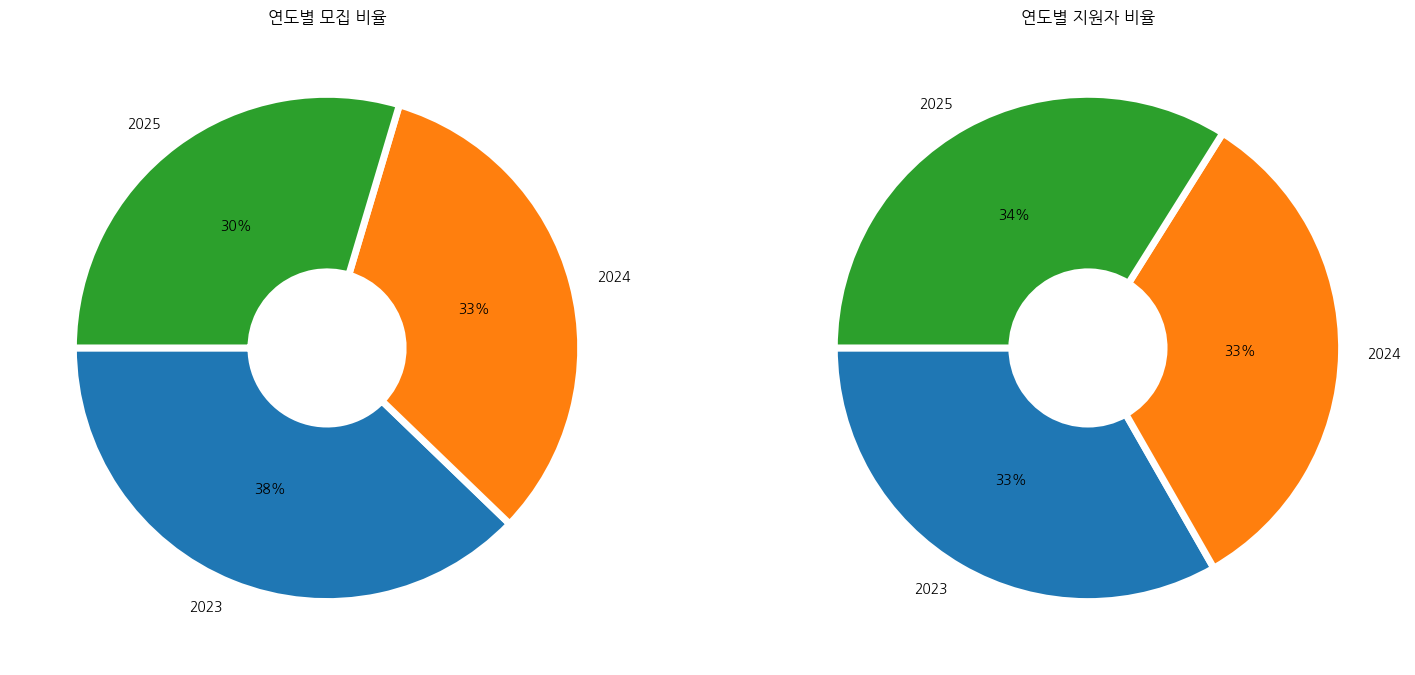

In [15]:
plt.figure(figsize=(18,12))

plt.subplot(121)
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.pie(target1['정원내모집'], labels = target1['연도'], autopct='%.0f%%', wedgeprops = wedgeprops, startangle=180)
plt.title('연도별 모집 비율')

plt.subplot(122)
plt.pie(target1['정원내지원'], labels = target1['연도'], autopct='%.0f%%', wedgeprops = wedgeprops, startangle=180)
plt.title('연도별 지원자 비율')

plt.show()

## 연도별 전형에 따른 모집 및 지원 경쟁률

In [16]:
target2 = pd.concat([df3, df4,df5])[['단과대학','정원내모집','정원내지원',
                                     '일반전형_모집','일반전형_지원','일반전형_경쟁률',
                  '교과우수_모집','교과우수_지원','교과우수_경쟁률',
                  '담임추천_모집','담임추천_지원','담임추천_경쟁률',
                  '창의면접_모집','창의면접_지원','창의면접_경쟁률',
                  '지역인재_모집','지역인재_지원','지역인재_경쟁률',
                  '국가보훈/지역기회균형_지원','국가보훈/지역기회균형_모집','국가보훈/지역기회균형_경쟁률',
                  '농어촌전형_모집','농어촌전형_지원',
                  '특성화고_모집','특성화고_지원',
                  '기회균형_모집','기회균형_지원',
                  '연도']]

target2 = target2[target2['단과대학'] =='계']
# print(target2)

In [17]:
연도 = np.repeat(['2023', '2024', '2025'],18)
구분 = np.tile(['지원', '모집'],27)
전형 = np.tile(np.repeat(['일반전형', '교과우수','담임추천','창의면접',
                        '지역인재','국가보훈/지역기회균형',
                        '농어촌전형','특성화고', '기회균형'],2),3)
ss2 = pd.DataFrame({'연도': 연도,'구분': 구분,'전형': 전형})

aa= target2[['일반전형_모집','일반전형_지원',
                  '교과우수_모집','교과우수_지원',
                  '담임추천_모집','담임추천_지원',
                  '창의면접_모집','창의면접_지원',
                  '지역인재_모집','지역인재_지원',
                  '국가보훈/지역기회균형_지원','국가보훈/지역기회균형_모집',
                  '농어촌전형_모집','농어촌전형_지원',
                  '특성화고_모집','특성화고_지원',
                  '기회균형_모집','기회균형_지원']].T

aa.columns = [2023, 2024, 2025]

ss2.loc[:17, '인원'] = aa[2023].values
ss2.loc[18:35, '인원'] = aa[2024].values
ss2.loc[36:53, '인원'] = aa[2025].values
# print(ss2)

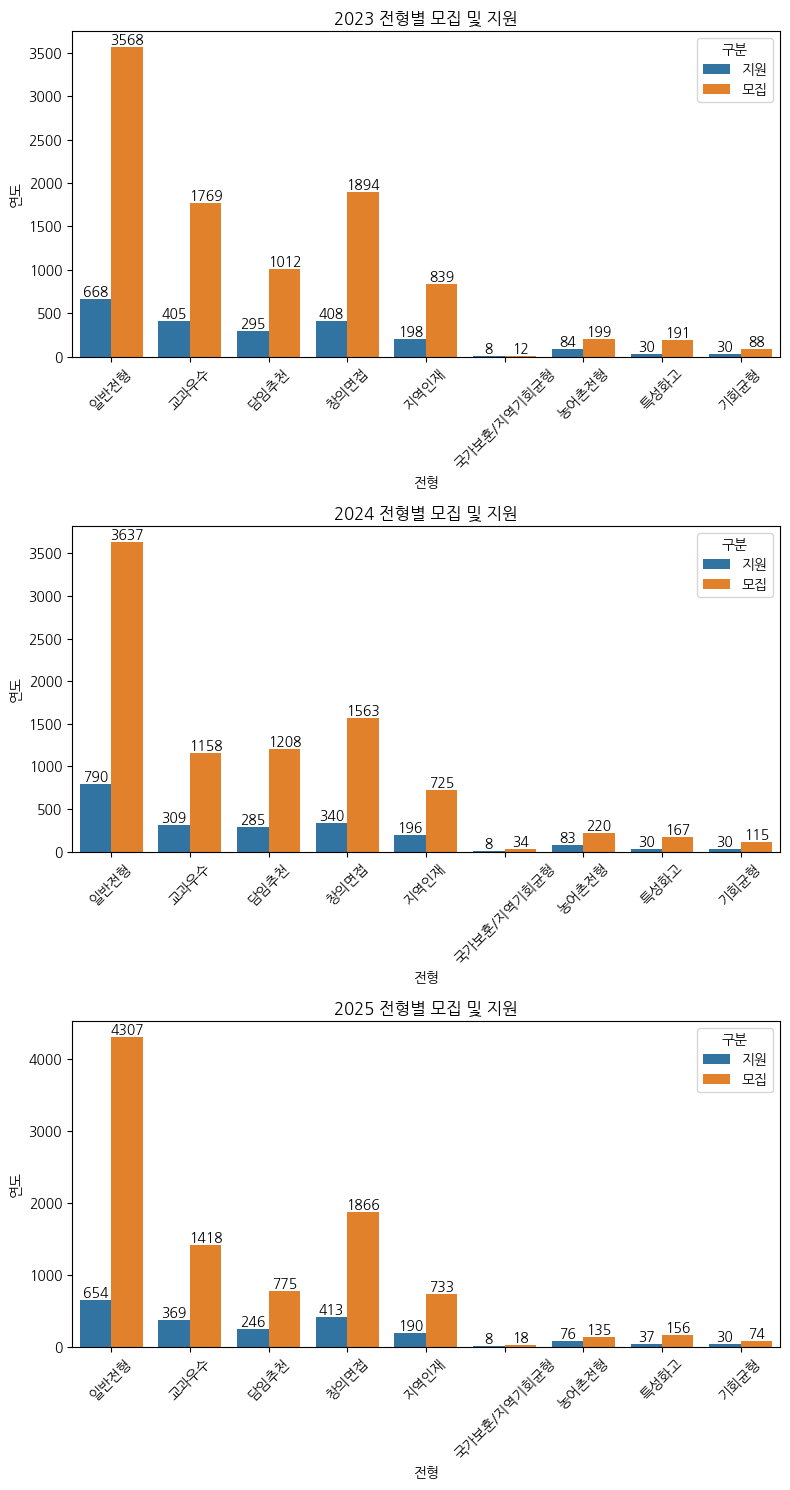

In [18]:
fig, axes = plt.subplots(3, 1, figsize=(8, 15))

for i, col in enumerate(ss2['연도'].unique()):
  filter_ss2 = ss2[ss2['연도'] == col]

  sns.barplot(x='전형', y='인원', data = filter_ss2, hue='구분' , ax=axes[i])
  for container in axes[i].containers:
    axes[i].bar_label(container, fmt='%.0f', label_type='edge', fontsize=10)
  axes[i].set_title(f'{col} 전형별 모집 및 지원')
  axes[i].set_xlabel('전형')
  axes[i].set_xticks(range(len(filter_ss2['전형'].unique())))
  axes[i].set_xticklabels(filter_ss2['전형'].unique(), rotation=45)
  axes[i].set_ylabel('연도')

plt.tight_layout()
plt.show()

In [19]:
dd3_지원 = ss2[(ss2['연도']=='2023') & (ss2['구분']=='지원')]
dd3_모집 = ss2[(ss2['연도']=='2023') & (ss2['구분']=='모집')]
dd4_지원 = ss2[(ss2['연도']=='2024') & (ss2['구분']=='지원')]
dd4_모집 = ss2[(ss2['연도']=='2024') & (ss2['구분']=='모집')]
dd5_지원 = ss2[(ss2['연도']=='2025') & (ss2['구분']=='지원')]
dd5_모집 = ss2[(ss2['연도']=='2025') & (ss2['구분']=='모집')]
# print(dd3_모집['인원'].shape)
# print(dd5_지원['전형'].shape)

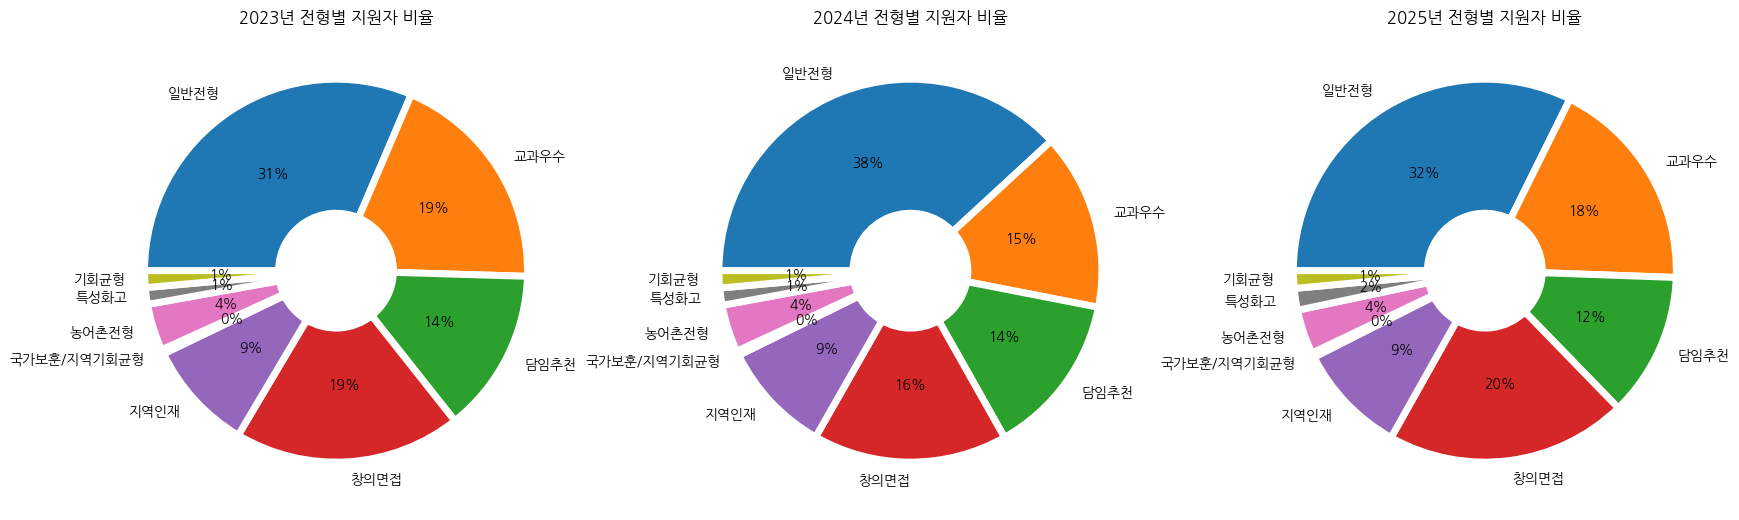

In [20]:
plt.figure(figsize=(21,16))

plt.subplot(131)
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.pie(dd3_지원['인원'], labels = dd3_지원['전형'], autopct='%.0f%%', wedgeprops = wedgeprops, startangle=180,counterclock=False)
plt.title('2023년 전형별 지원자 비율')

plt.subplot(132)
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.pie(dd4_지원['인원'], labels = dd4_지원['전형'], autopct='%.0f%%', wedgeprops = wedgeprops, startangle=180,counterclock=False)
plt.title('2024년 전형별 지원자 비율')

plt.subplot(133)
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.pie(dd5_지원['인원'], labels = dd5_지원['전형'], autopct='%.0f%%', wedgeprops = wedgeprops, startangle=180,counterclock=False)
plt.title('2025년 전형별 지원자 비율')

plt.show()

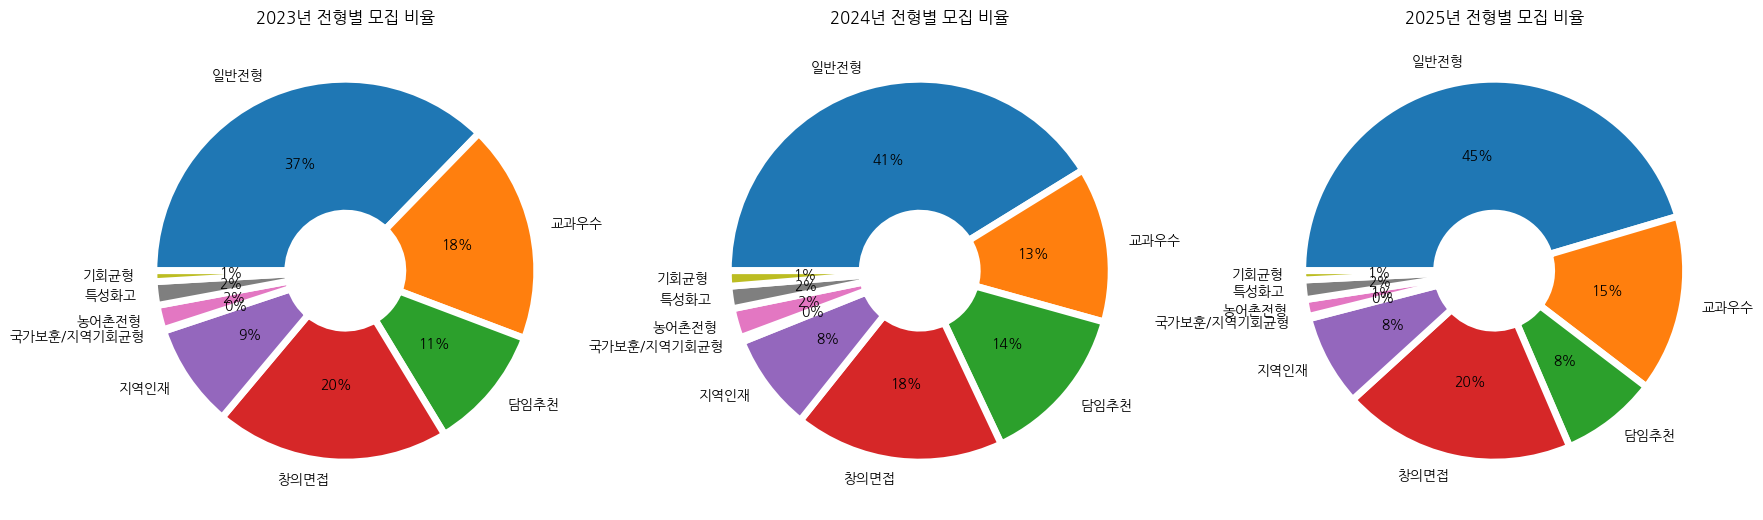

In [21]:
plt.figure(figsize=(21,16))

plt.subplot(131)
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.pie(dd3_모집['인원'], labels = dd3_모집['전형'], autopct='%.0f%%', wedgeprops = wedgeprops, startangle=180,counterclock=False)
plt.title('2023년 전형별 모집 비율')

plt.subplot(132)
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.pie(dd4_모집['인원'], labels = dd4_모집['전형'], autopct='%.0f%%', wedgeprops = wedgeprops, startangle=180,counterclock=False)
plt.title('2024년 전형별 모집 비율')

plt.subplot(133)
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.pie(dd5_모집['인원'], labels = dd5_모집['전형'], autopct='%.0f%%', wedgeprops = wedgeprops, startangle=180,counterclock=False)
plt.title('2025년 전형별 모집 비율')


plt.show()

In [22]:
ee3 = df3[df3['학과'] == '계'][['학과','일반전형_경쟁률','교과우수_경쟁률','담임추천_경쟁률','창의면접_경쟁률','지역인재_경쟁률','국가보훈/지역기회균형_경쟁률','연도']]
ee4 = df4[df4['학과'] == '계'][['학과','일반전형_경쟁률','교과우수_경쟁률','담임추천_경쟁률','창의면접_경쟁률','지역인재_경쟁률','국가보훈/지역기회균형_경쟁률','연도']]
ee5 = df5[df5['학과'] == '계'][['학과','일반전형_경쟁률','교과우수_경쟁률','담임추천_경쟁률','창의면접_경쟁률','지역인재_경쟁률','국가보훈/지역기회균형_경쟁률','연도']]

연도 = np.repeat(['2023', '2024', '2025'],6)
구분 = np.tile(['일반전형_경쟁률','교과우수_경쟁률','담임추천_경쟁률',
               '창의면접_경쟁률','지역인재_경쟁률',
               '국가보훈/지역기회균형_경쟁률'],3)
ee2 = pd.DataFrame({'연도': 연도,'구분': 구분})

ee2.loc[:5, '경쟁률'] = ee3.iloc[:,1:7].values.flatten()
ee2.loc[6:11, '경쟁률'] = ee4.iloc[:,1:7].values.flatten()
ee2.loc[12:17, '경쟁률'] = ee5.iloc[:,1:7].values.flatten()
ee2['경쟁률'] = pd.to_numeric(ee2['경쟁률'], errors='coerce')
ee2['경쟁률'] = round(ee2['경쟁률'],2)
ee2.iloc[10,2] = 3.57
# print(ee2)

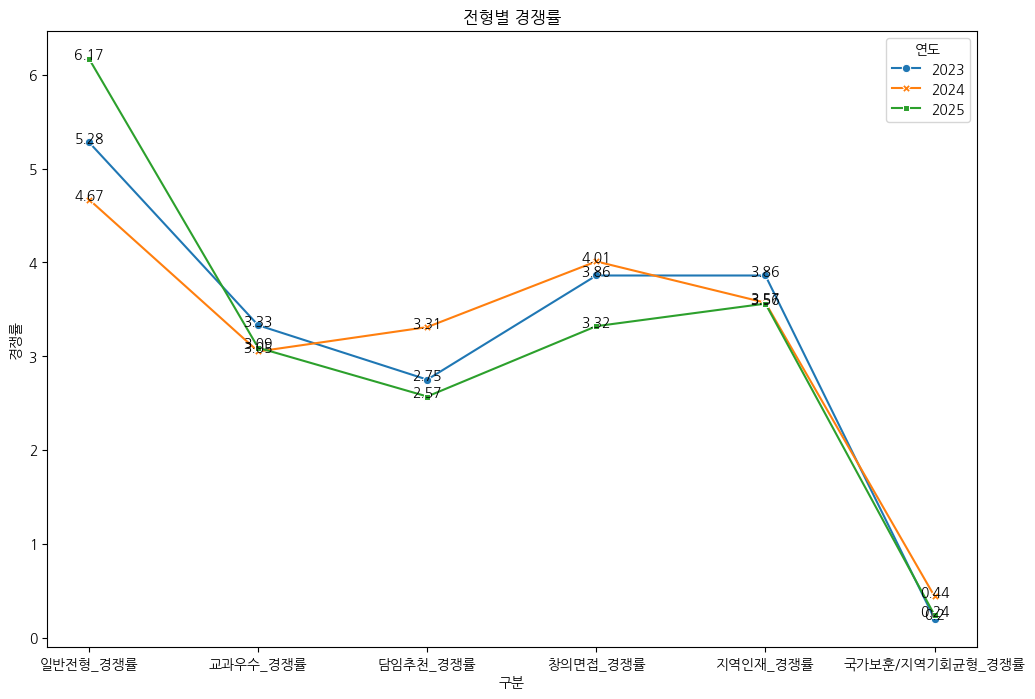

In [23]:
plt.figure(figsize=(12,8))
plt.rc('font', family='NanumGothic')

ax = sns.lineplot(x='구분',y='경쟁률',hue='연도', data=ee2, style="연도", dashes=False, markers=True)
for x, y in zip(ee2['구분'], ee2['경쟁률']):
    ax.text(x, y , f'{y}', ha='center')
plt.title('전형별 경쟁률')
plt.show()

## 연도별 단과대학 모집 및 지원 및 경쟁률

In [24]:
target4 = pd.concat([df3, df4,df5])[['단과대학','학과','정원내모집','정원내지원',
                                     '일반전형_모집','일반전형_지원','일반전형_경쟁률',
                  '교과우수_모집','교과우수_지원','교과우수_경쟁률',
                  '담임추천_모집','담임추천_지원','담임추천_경쟁률',
                  '창의면접_모집','창의면접_지원','창의면접_경쟁률',
                  '지역인재_모집','지역인재_지원','지역인재_경쟁률',
                  '국가보훈/지역기회균형_지원','국가보훈/지역기회균형_모집','국가보훈/지역기회균형_경쟁률',
                  '농어촌전형_모집','농어촌전형_지원',
                  '특성화고_모집','특성화고_지원',
                  '기회균형_모집','기회균형_지원',
                  '연도']]

In [25]:
연도 = np.repeat(['2023', '2024', '2025'],12)
구분 = np.tile(np.repeat(['모집', '지원'],6),3)
단과대학 = np.tile(['공과대학','보건의료과학대학','비지니스대학','사범대학',
              '인문사회과학대학','직할학부'],6)

qq2 = pd.DataFrame({'연도': 연도,'구분': 구분,'단과대학':단과대학})

qq2.loc[12:23, '단과대학'] = qq2.loc[0:11, '단과대학'].values
qq2.loc[24:35, '단과대학'] = qq2.loc[0:11, '단과대학'].values

vv = target4[target4['단과대학'] == '단과대학/정원내'][['정원내모집','정원내지원','연도','학과']]
vv = vv.sort_values('정원내모집', ascending=True).sort_values(['연도','학과','정원내모집'],ascending=True).reset_index(drop=True)

qq2 = qq2.sort_values('구분', ascending=True).sort_values(['연도','구분','단과대학'],ascending=True).reset_index(drop=True)

qq2.loc[:5, '인원'] = vv.iloc[0:6,0].values
qq2.loc[6:11, '인원'] = vv.iloc[0:6,1].values
qq2.loc[12:17, '인원'] = vv.iloc[6:12,0].values
qq2.loc[18:23, '인원'] = vv.iloc[6:12,1].values
qq2.loc[24:29, '인원'] = vv.iloc[12:18,0].values
qq2.loc[30:35, '인원'] = vv.iloc[12:18,1].values
# print(qq2)

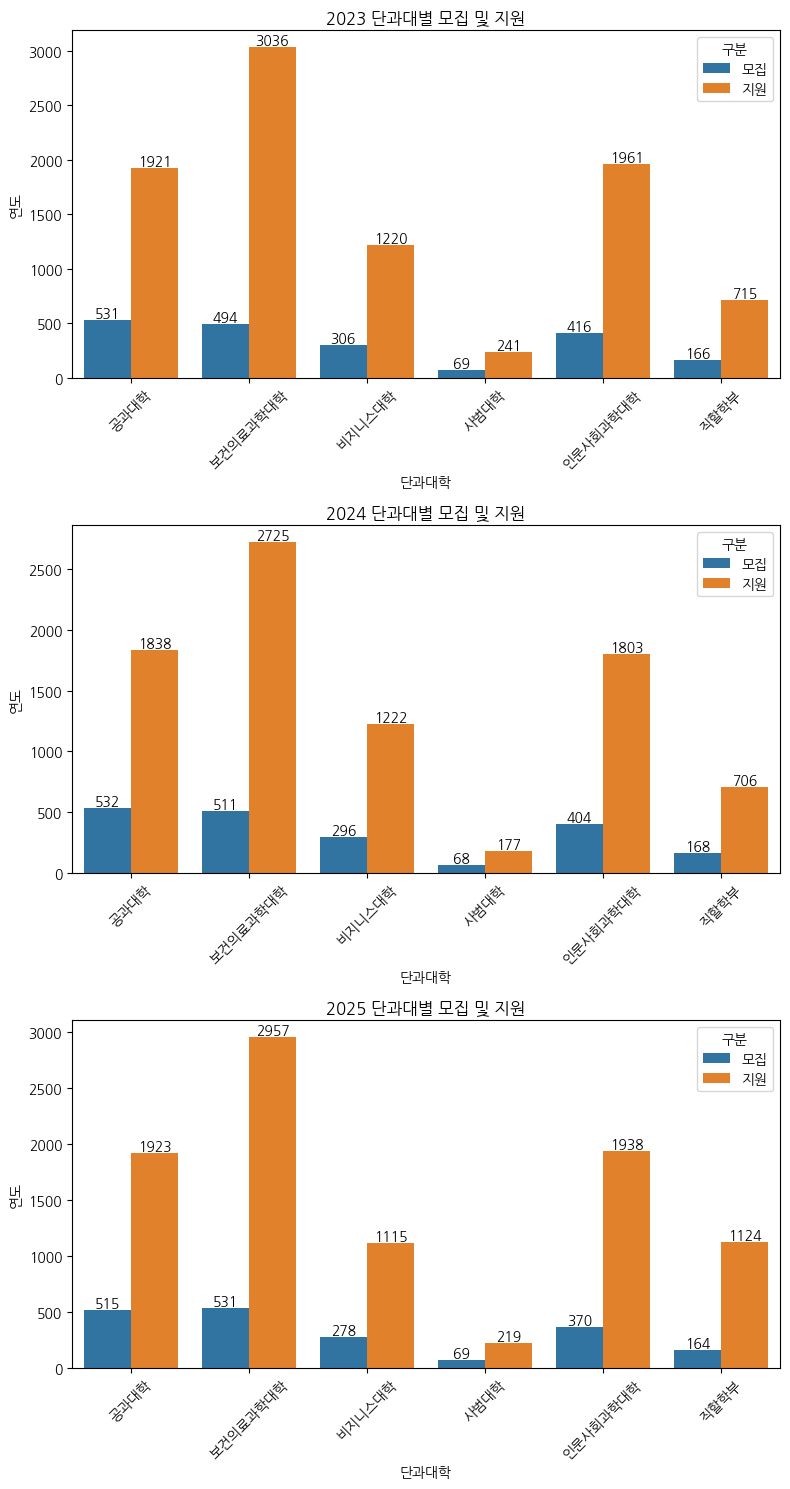

In [26]:
fig, axes = plt.subplots(3, 1, figsize=(8, 15))

for i, col in enumerate(qq2['연도'].unique()):
  filter_qq2 = qq2[qq2['연도'] == col]

  sns.barplot(x='단과대학', y='인원', data = filter_qq2, hue='구분' , ax=axes[i])
  for container in axes[i].containers:
    axes[i].bar_label(container, fmt='%.0f', label_type='edge', fontsize=10)
  axes[i].set_title(f'{col} 단과대별 모집 및 지원')
  axes[i].set_xlabel('단과대학')
  axes[i].set_xticks(range(len(filter_qq2['단과대학'].unique())))
  axes[i].set_xticklabels(filter_qq2['단과대학'].unique(), rotation=45)
  axes[i].set_ylabel('연도')

plt.tight_layout()
plt.show()

In [27]:
qq3_지원 = qq2[(qq2['연도']=='2023') & (qq2['구분']=='지원')]
qq3_모집 = qq2[(qq2['연도']=='2023') & (qq2['구분']=='모집')]
qq4_지원 = qq2[(qq2['연도']=='2024') & (qq2['구분']=='지원')]
qq4_모집 = qq2[(qq2['연도']=='2024') & (qq2['구분']=='모집')]
qq5_지원 = qq2[(qq2['연도']=='2025') & (qq2['구분']=='지원')]
qq5_모집 = qq2[(qq2['연도']=='2025') & (qq2['구분']=='모집')]

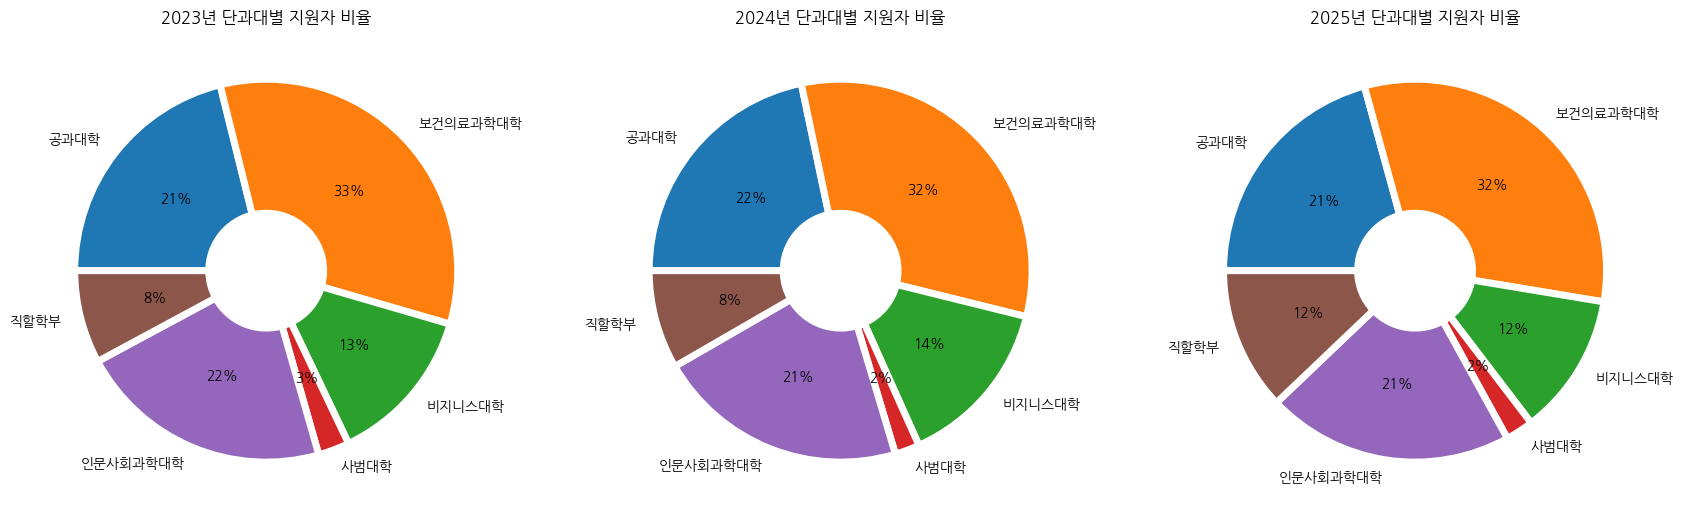

In [28]:
plt.figure(figsize=(21,16))

plt.subplot(131)
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.pie(qq3_지원['인원'], labels = qq3_지원['단과대학'], autopct='%.0f%%', wedgeprops = wedgeprops, startangle=180,counterclock=False)
plt.title('2023년 단과대별 지원자 비율')

plt.subplot(132)
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.pie(qq4_지원['인원'], labels = qq4_지원['단과대학'], autopct='%.0f%%', wedgeprops = wedgeprops, startangle=180,counterclock=False)
plt.title('2024년 단과대별 지원자 비율')

plt.subplot(133)
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.pie(qq5_지원['인원'], labels = qq5_지원['단과대학'], autopct='%.0f%%', wedgeprops = wedgeprops, startangle=180,counterclock=False)
plt.title('2025년 단과대별 지원자 비율')

plt.show()

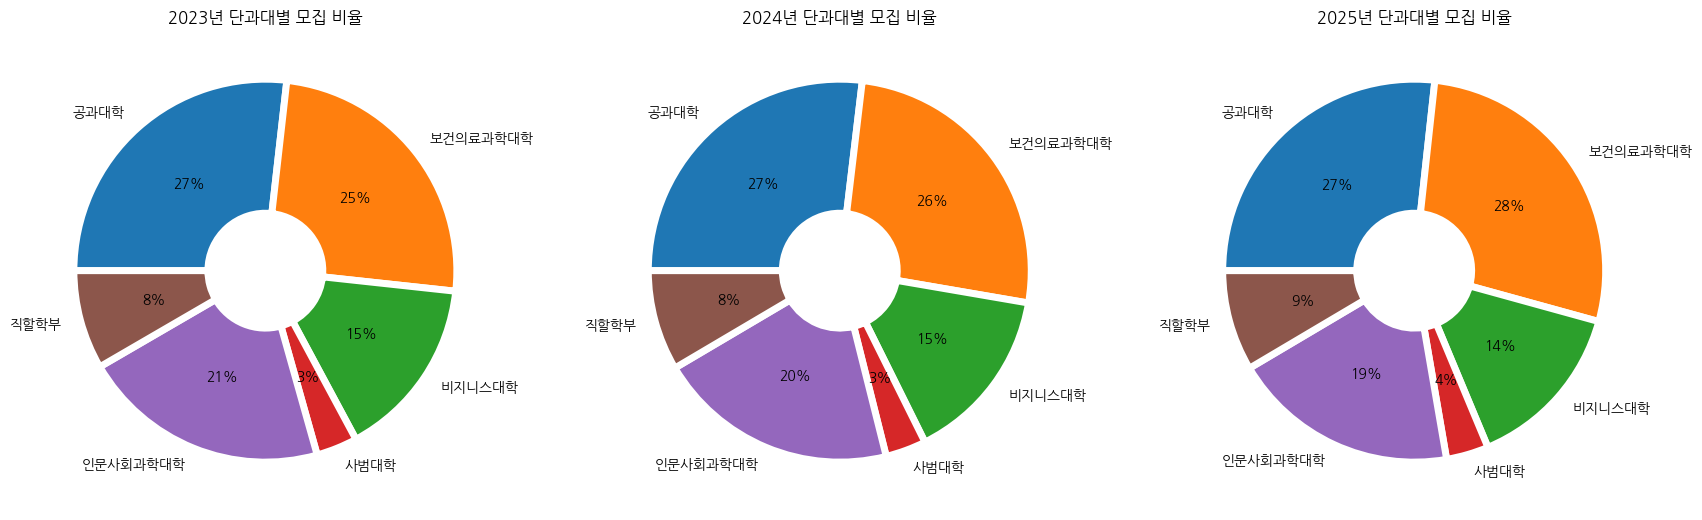

In [29]:
plt.figure(figsize=(21,16))

plt.subplot(131)
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.pie(qq3_모집['인원'], labels = qq3_모집['단과대학'], autopct='%.0f%%', wedgeprops = wedgeprops, startangle=180,counterclock=False)
plt.title('2023년 단과대별 모집 비율')

plt.subplot(132)
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.pie(qq4_모집['인원'], labels = qq4_모집['단과대학'], autopct='%.0f%%', wedgeprops = wedgeprops, startangle=180,counterclock=False)
plt.title('2024년 단과대별 모집 비율')

plt.subplot(133)
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.pie(qq5_모집['인원'], labels = qq5_모집['단과대학'], autopct='%.0f%%', wedgeprops = wedgeprops, startangle=180,counterclock=False)
plt.title('2025년 단과대별 모집 비율')

plt.show()

In [30]:
gg3 = df3.tail(6)[['학과','정원내경쟁률','연도']]
gg4 = df4.tail(6)[['학과','정원내경쟁률','연도']]
gg5 = df5.tail(6)[['학과','정원내경쟁률','연도']]

gg6 = pd.concat([gg3,gg4,gg5],axis=0)
gg6['정원내경쟁률'] = round(gg6['정원내경쟁률'],1)
# print(gg6)

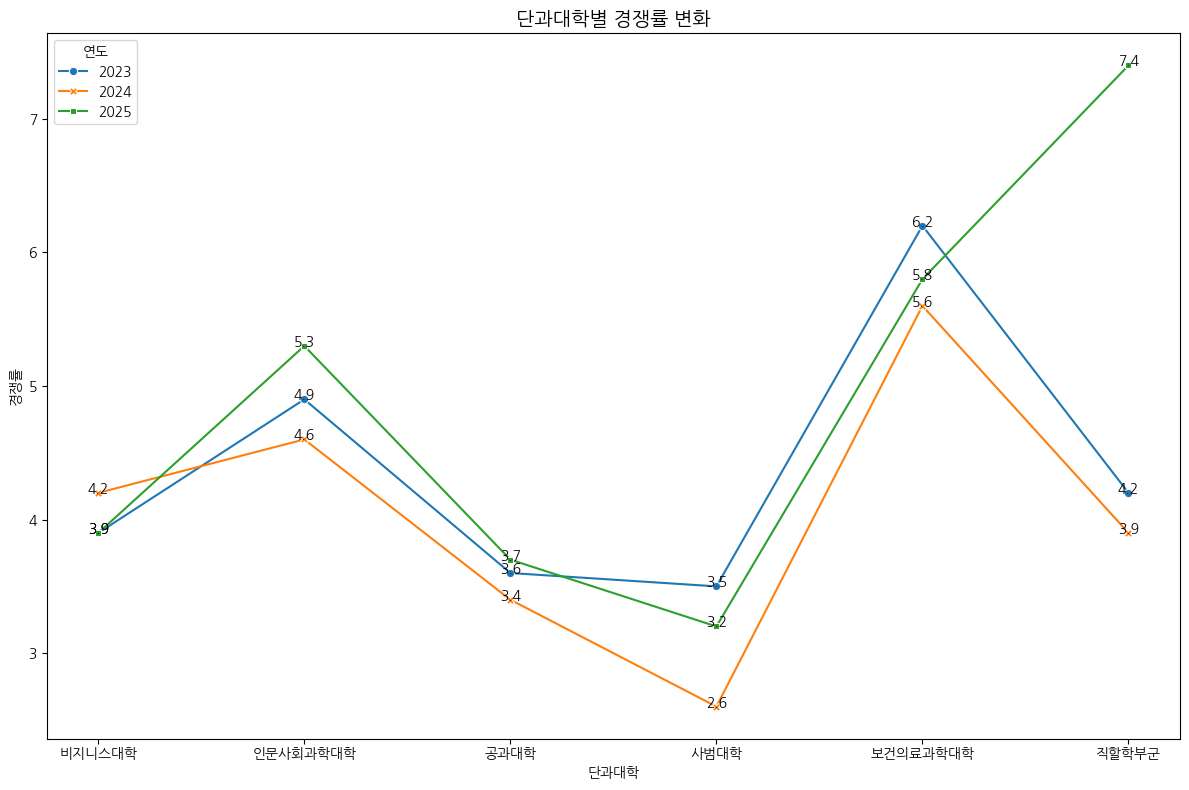

In [31]:
plt.figure(figsize=(12,8))
plt.rc('font', family='NanumGothic')

ax = sns.lineplot(x='학과',y='정원내경쟁률',hue='연도', data=gg6, style="연도", dashes=False, markers=True)
for x, y in zip(gg6['학과'], gg6['정원내경쟁률']):
    ax.text(x, y , f'{y}', ha='center')
plt.title('단과대학별 경쟁률 변화', fontsize=14)
plt.ylabel('경쟁률')
plt.xlabel('단과대학')
plt.tight_layout()
plt.show()

## 학과별 전형에 따른 모집 및 지원, 경쟁률

In [32]:
df31 = df3.iloc[:-9]
df41 = df4.iloc[:-9]
df51 = df5.iloc[:-9]

target8 = pd.concat([df31,df41,df51],axis=0).round(2).reset_index(drop=True)

In [33]:
plt.rc('font', family='NanumGothic')

def visualize_department(target8, department):
    hh2 = pd.DataFrame({
        '연도': np.repeat([2023, 2024, 2025], 18),
        '구분': np.tile(['모집', '지원'], 27),
        '전형': np.tile(np.repeat(['일반전형', '교과우수', '담임추천',
                                 '창의면접', '지역인재', '국가보훈/지역기회균형',
                                 '농어촌전형', '특성화고', '기회균형'], 2),3)
                      })


    # 모집 및 지원 데이터 매핑
    aa = target8[target8['학과'] == department][[
        '일반전형_모집', '일반전형_지원',
        '교과우수_모집', '교과우수_지원',
        '담임추천_모집', '담임추천_지원',
        '창의면접_모집', '창의면접_지원',
        '지역인재_모집', '지역인재_지원',
        '국가보훈/지역기회균형_모집', '국가보훈/지역기회균형_지원',
        '농어촌전형_모집', '농어촌전형_지원',
        '특성화고_모집', '특성화고_지원',
        '기회균형_모집', '기회균형_지원'
    ]].T

    hh2['인원'] = np.concatenate([aa.iloc[:, i].values for i in range(3)])

    # 2. 경쟁률 데이터 준비
    ii2 = pd.DataFrame({
        '연도': np.repeat([2023, 2024, 2025], 6),
        '전형': np.tile([
            '일반전형', '교과우수', '담임추천',
            '창의면접', '지역인재', '국가보훈/지역기회균형'], 3)
    })

    zz = target8[target8['학과'] == department][[
        '일반전형_경쟁률',
        '교과우수_경쟁률',
        '담임추천_경쟁률',
        '창의면접_경쟁률',
        '지역인재_경쟁률',
        '국가보훈/지역기회균형_경쟁률'
    ]].T

    ii2['경쟁률'] = np.concatenate([zz.iloc[:, i].values for i in range(3)])

    # 3. 시각화
    fig, axes = plt.subplots(1, 2, figsize=(18, 8))

    # (1) 모집 및 지원 인원 막대 그래프
    hh2['구분_연도'] = hh2['구분'] + "_" + hh2['연도'].astype(str)
    sns.barplot(x='전형', y='인원', hue='구분_연도', data=hh2, ax=axes[0])
    for container in axes[0].containers:
        axes[0].bar_label(container, fmt='%.0f', label_type='edge', fontsize=10)
    axes[0].set_title(f'{department} 모집 및 지원')
    axes[0].set_xlabel('전형')
    # axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
    axes[0].set_xticks(range(len(hh2['전형'].unique())))
    axes[0].set_xticklabels(hh2['전형'].unique(), rotation=45)
    axes[0].set_ylabel('인원')

    # (2) 경쟁률 선 그래프
    sns.lineplot(x='전형', y='경쟁률', hue='연도', data=ii2, style='연도', markers=True, ax=axes[1])
    for x, y in zip(ii2['전형'], ii2['경쟁률']):
        axes[1].text(x, y+0.02, f'{y:.2f}', ha='center')
    axes[1].set_title(f'{department} 경쟁률')
    axes[1].set_xlabel('전형')
    # axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
    axes[1].set_xticks(range(len(ii2['전형'].unique())))
    axes[1].set_xticklabels(ii2['전형'].unique(), rotation=45)
    axes[1].set_ylabel('경쟁률')

    plt.tight_layout()
    plt.show()

# 학과별 그래프 생성
for department in target8['학과'].unique():
    visualize_department(target8, department)


Output hidden; open in https://colab.research.google.com to view.

## 성적데이터 불러오기


In [34]:
dfs3 = pd.read_excel('/content/drive/MyDrive/통계모델링/2023_모집결과3.xlsx',header=[0,2]).fillna(0).round(2)
dfs4 = pd.read_excel('/content/drive/MyDrive/통계모델링/2024_모집결과3.xlsx',header=[0,2]).fillna(0).round(2)

In [35]:
dfs3['연도'] = 2023
dfs3.columns = ['대학','학과','일반전형_평균','교과우수_평균','담임추천_평균','창의면접_평균','지역인재_평균','연도']
dfs3['지역인재_평균'] = dfs3['지역인재_평균'].replace('-','0').astype('float').round(2)

dfs4['연도'] = 2024
dfs4.columns = ['대학','학과','일반전형_평균','교과우수_평균','담임추천_평균','창의면접_평균','지역인재_평균','연도']

target11 = pd.concat([dfs3,dfs4],axis=0)

## 단과대학 및 학과 별 수시 성적 변화

In [36]:
target12 = target11[target11['학과']=='평균']
target12['지역인재_평균'] = target12['지역인재_평균'].astype('float').round(2)
dfs = target12.drop('학과', axis=1).groupby(['대학', '연도'],as_index=False).mean().round(2)
dfs2 = dfs.copy()
dfs['평균'] = dfs2.drop(['대학','연도'], axis=1).mean(axis=1).round(2)
print(dfs)

          대학    연도  일반전형_평균  교과우수_평균  담임추천_평균  창의면접_평균  지역인재_평균    평균
0       공과대학  2023     4.45     4.91     5.11     5.17     5.03  4.93
1       공과대학  2024     4.71     4.98     5.17     5.73     5.11  5.14
2   보건의료과학대학  2023     3.55     4.18     4.58     4.29     3.63  4.05
3   보건의료과학대학  2024     3.65     4.62     4.61     4.32     3.78  4.20
4     비즈니스대학  2023     4.47     4.54     5.15     5.55     4.92  4.93
5     비즈니스대학  2024     4.44     4.72     4.82     5.29     4.68  4.79
6       사범대학  2023     3.48     2.96     3.46     3.29     3.90  3.42
7       사범대학  2024     4.01     3.63     3.44     4.16     4.56  3.96
8     인문사회대학  2023     3.81     3.94     4.39     4.74     4.10  4.20
9     인문사회대학  2024     4.07     4.27     4.25     4.94     4.45  4.40
10      직할학부  2023     4.12     3.94     4.93     4.82     5.42  4.65
11      직할학부  2024     4.28     4.52     5.12     4.87     4.71  4.70


<ipython-input-36-e0c76e7b5290>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target12['지역인재_평균'] = target12['지역인재_평균'].astype('float').round(2)


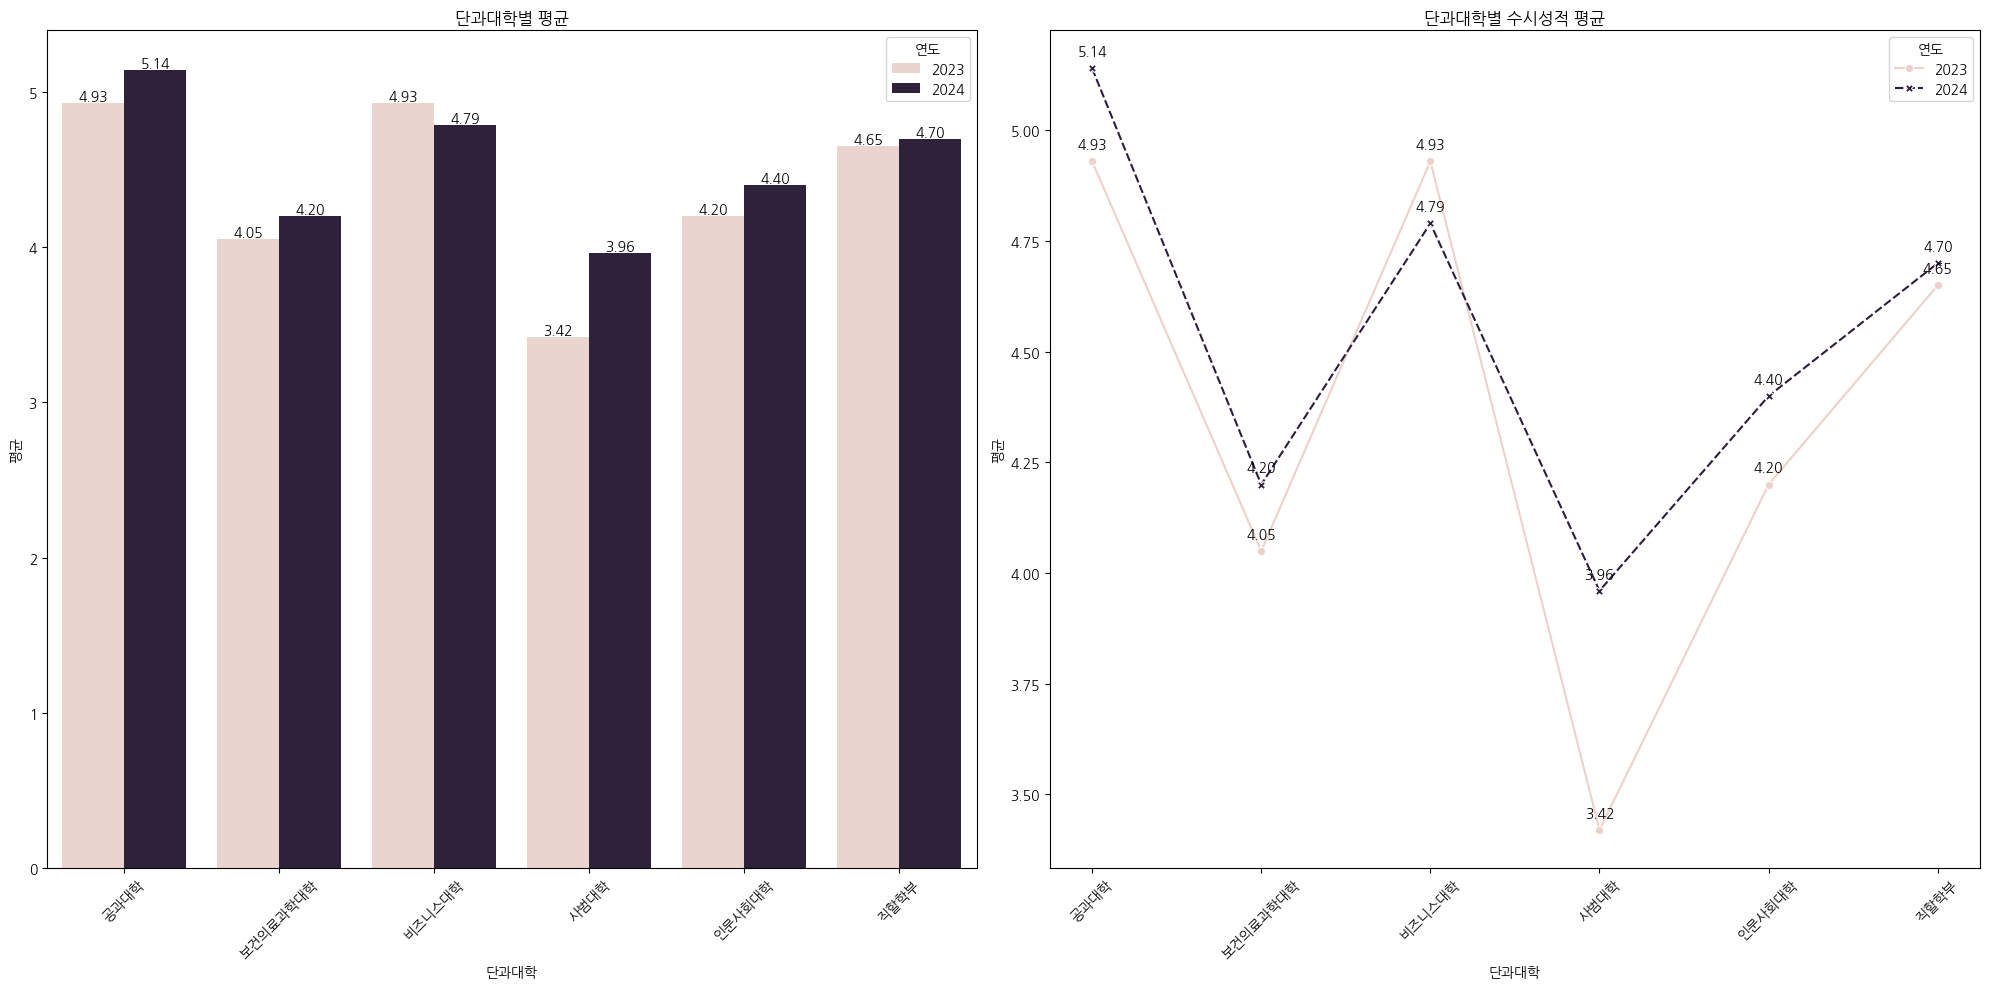

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

sns.barplot(x='대학', y='평균', hue='연도', data=dfs, ax=axes[0])
for container in axes[0].containers:
        axes[0].bar_label(container, fmt='%.2f', label_type='edge', fontsize=10)
axes[0].set_title('단과대학별 평균')
axes[0].set_xlabel('단과대학')
# axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
axes[0].set_xticks(range(len(dfs['대학'].unique())))
axes[0].set_xticklabels(dfs['대학'].unique(), rotation=45)
axes[0].set_ylabel('평균')

sns.lineplot(x='대학', y='평균', hue='연도', data=dfs, style='연도', markers=True, ax=axes[1])
for x, y in zip(dfs['대학'], dfs['평균']):
        axes[1].text(x, y+0.03, f'{y:.2f}', ha='center')
axes[1].set_title('단과대학별 수시성적 평균')
axes[1].set_xlabel('단과대학')
# axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
axes[1].set_xticks(range(len(dfs['대학'].unique())))
axes[1].set_xticklabels(dfs['대학'].unique(), rotation=45)
axes[1].set_ylabel('평균')

plt.tight_layout()
plt.show()

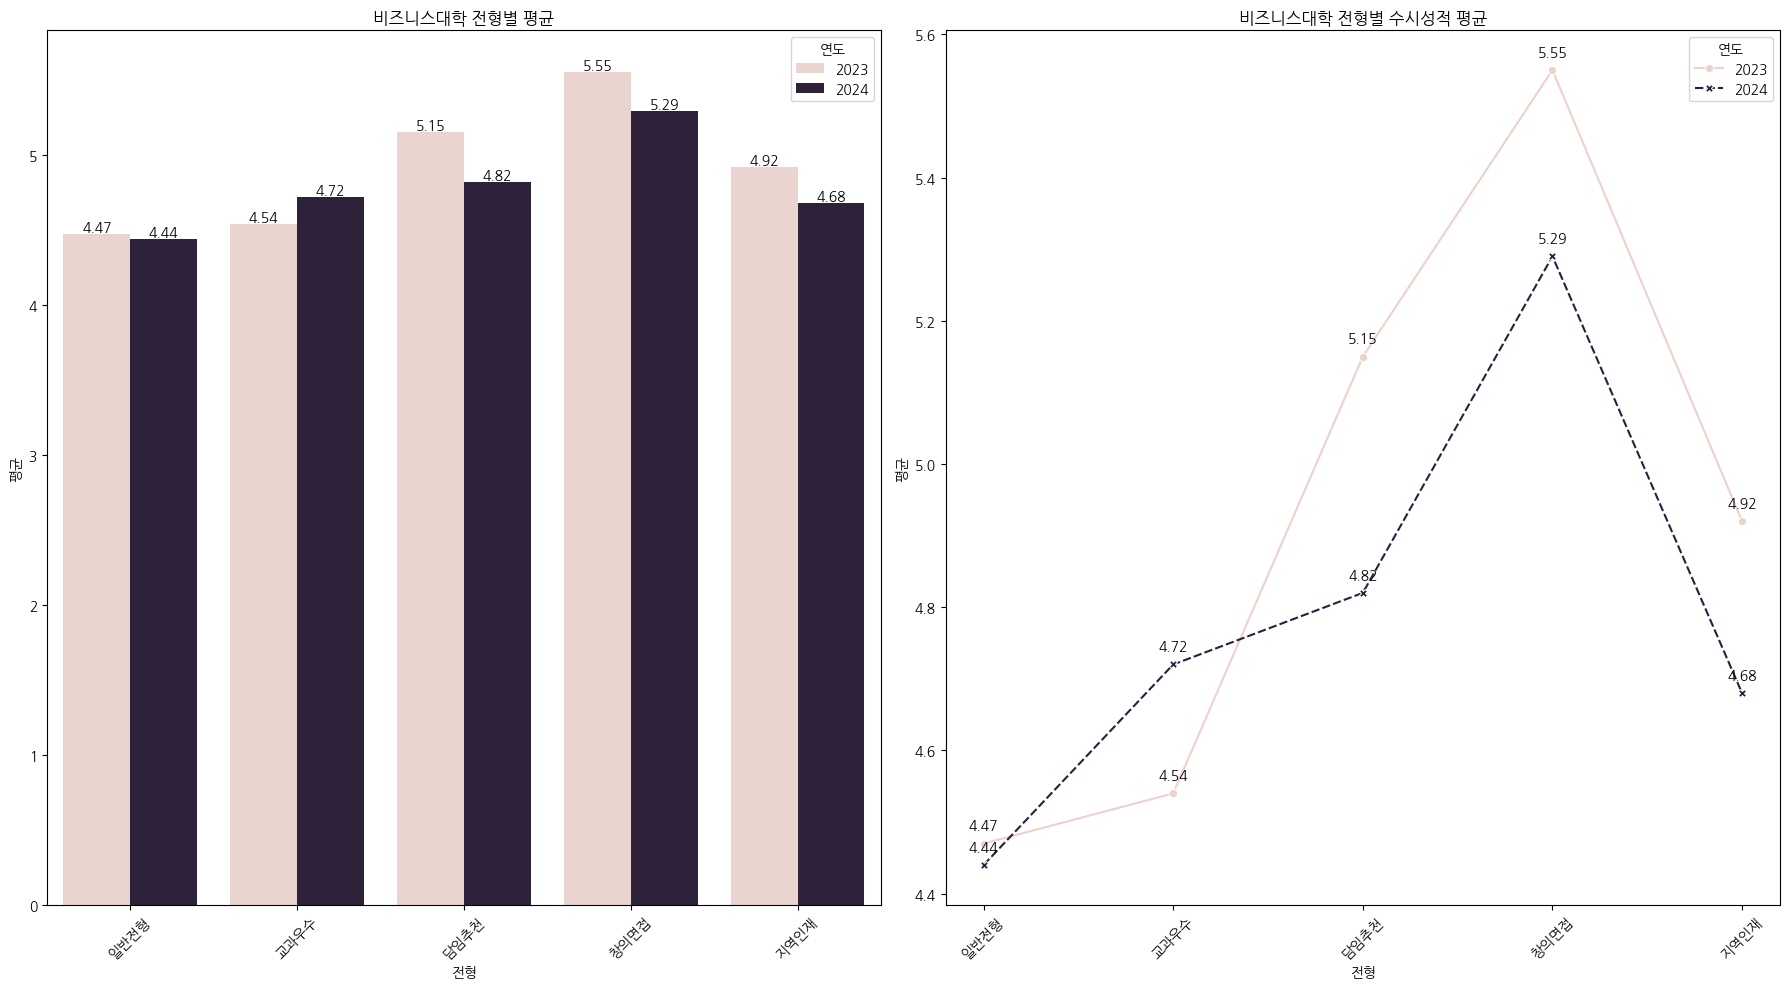

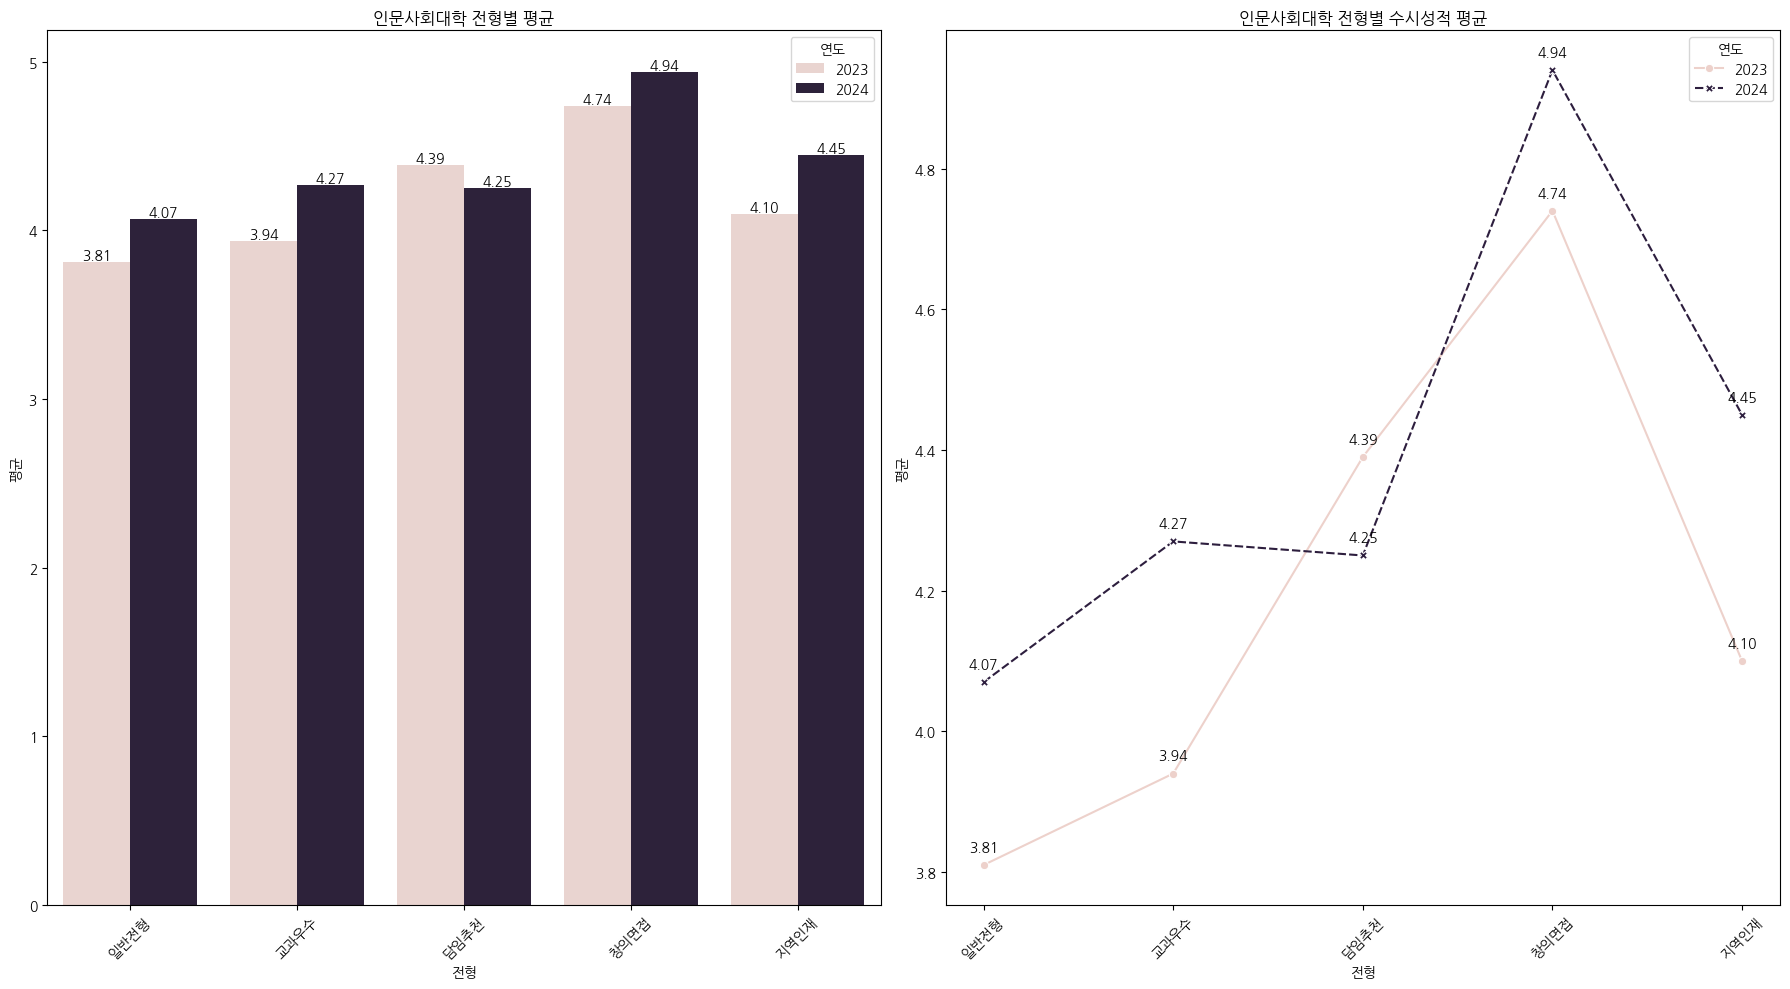

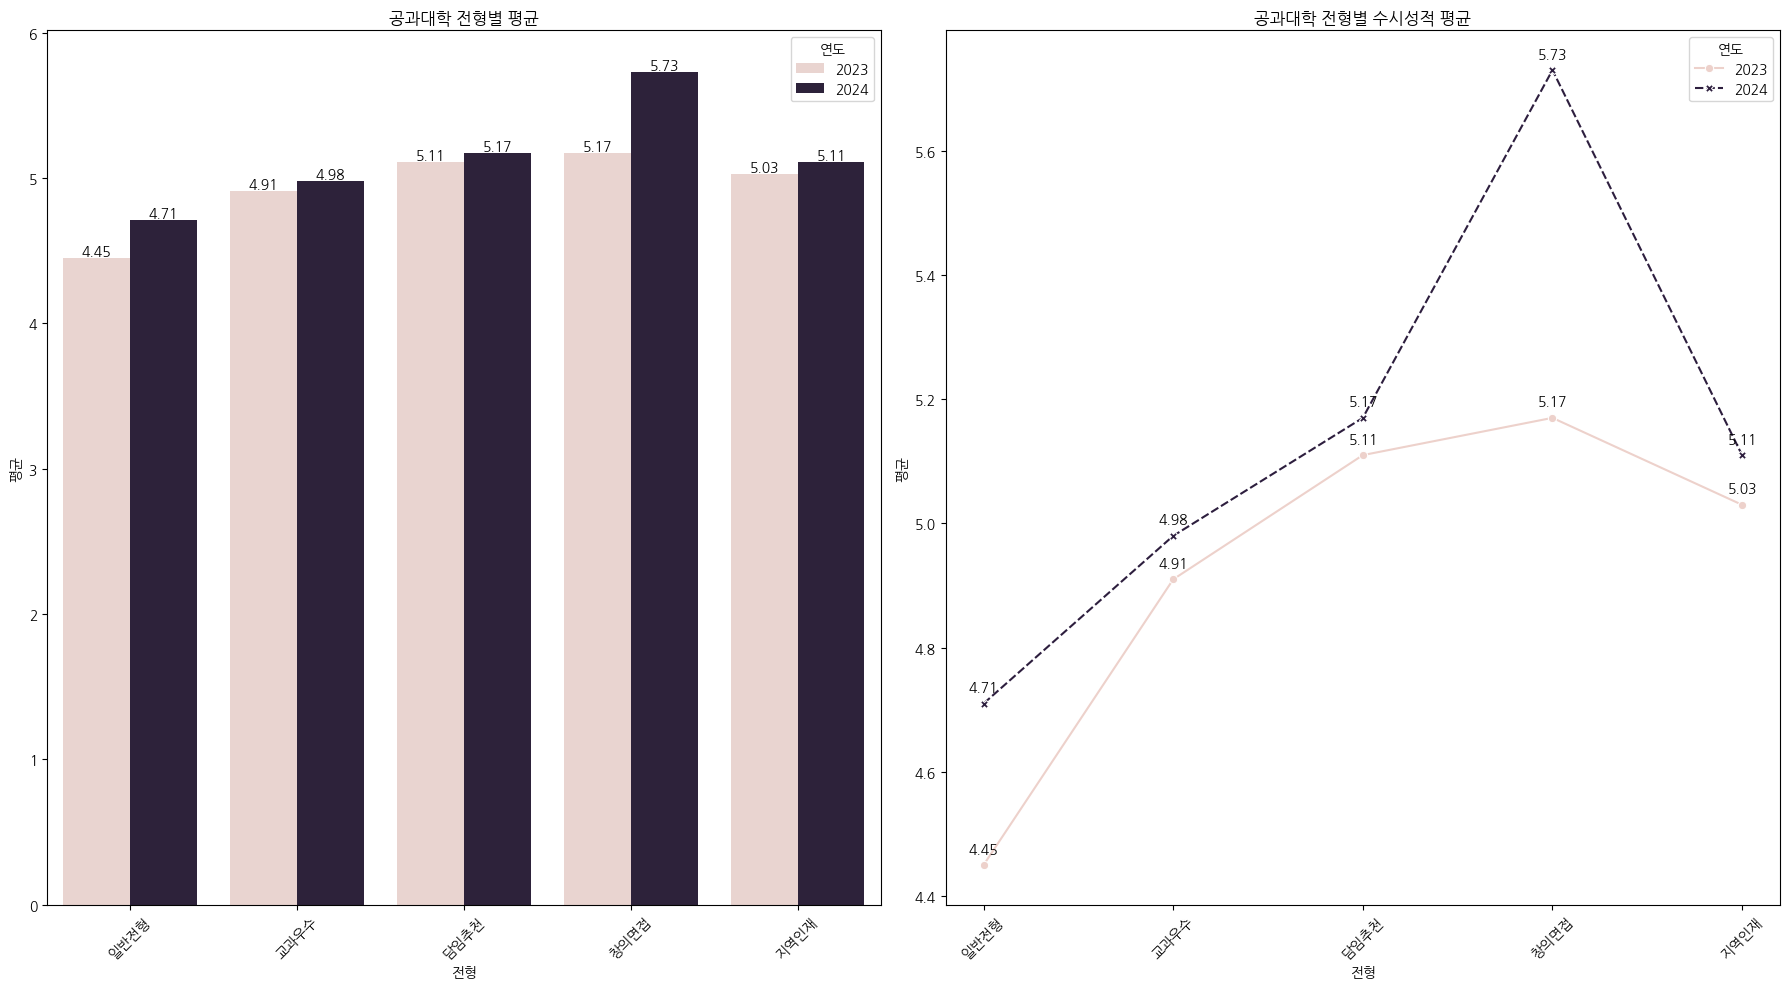

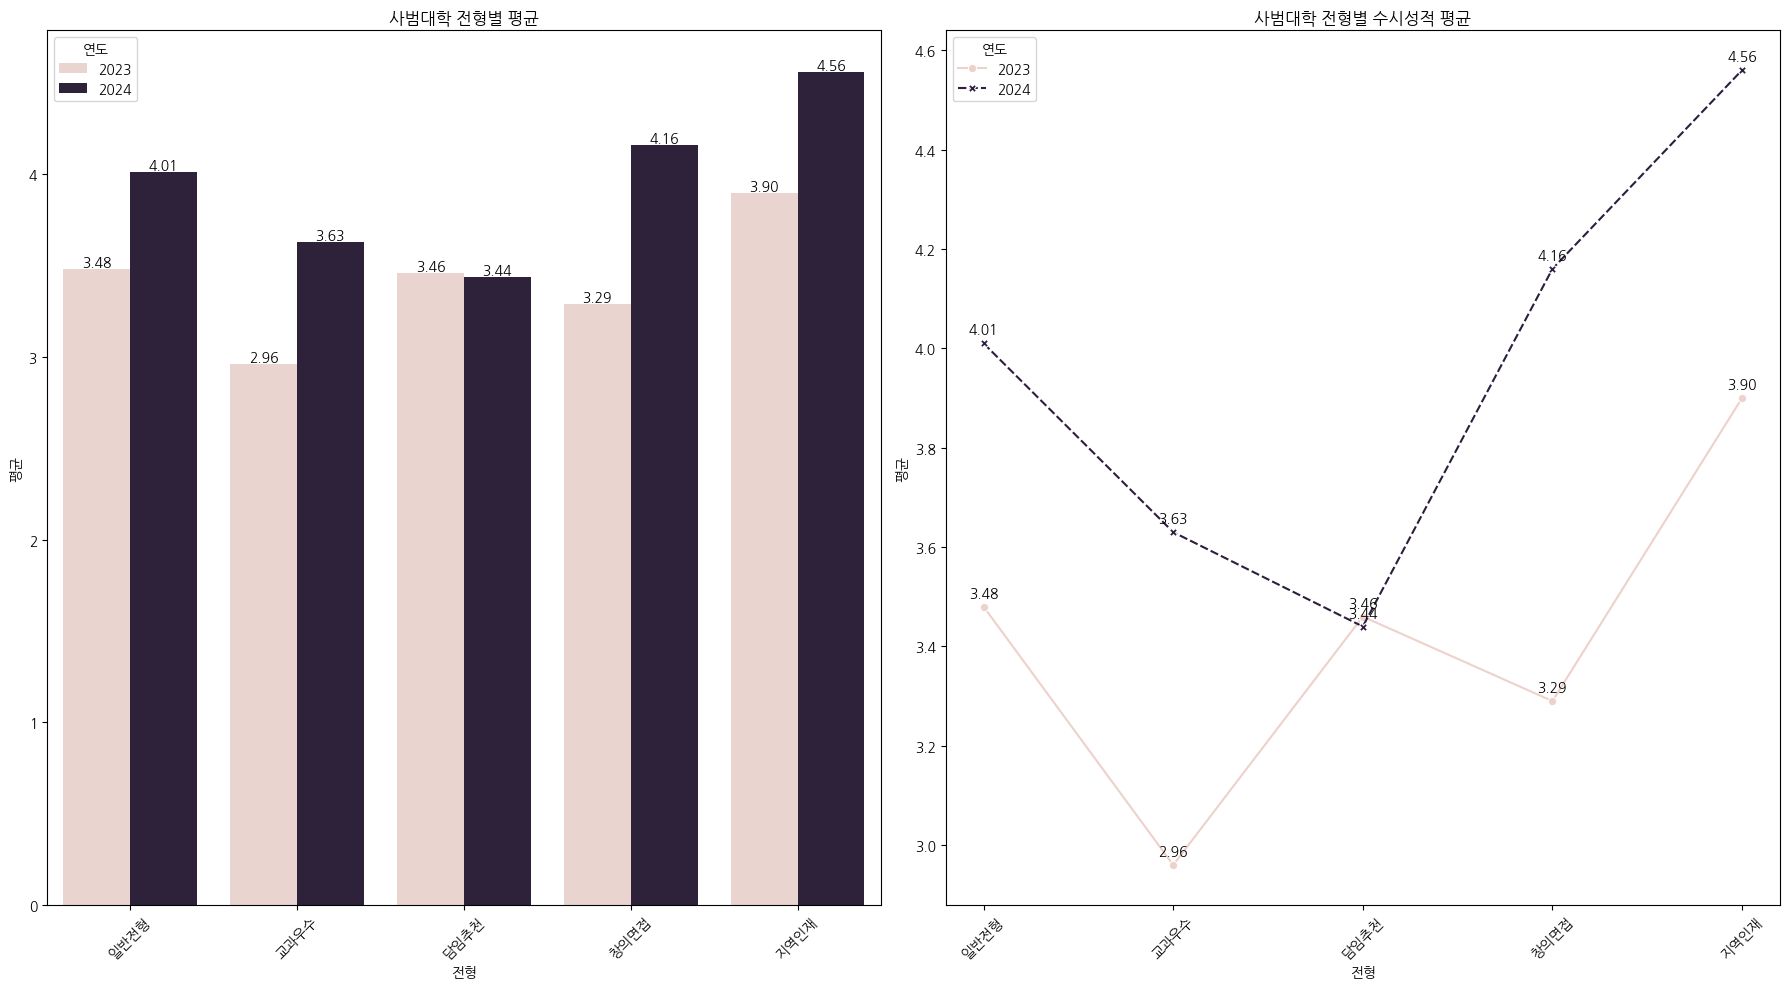

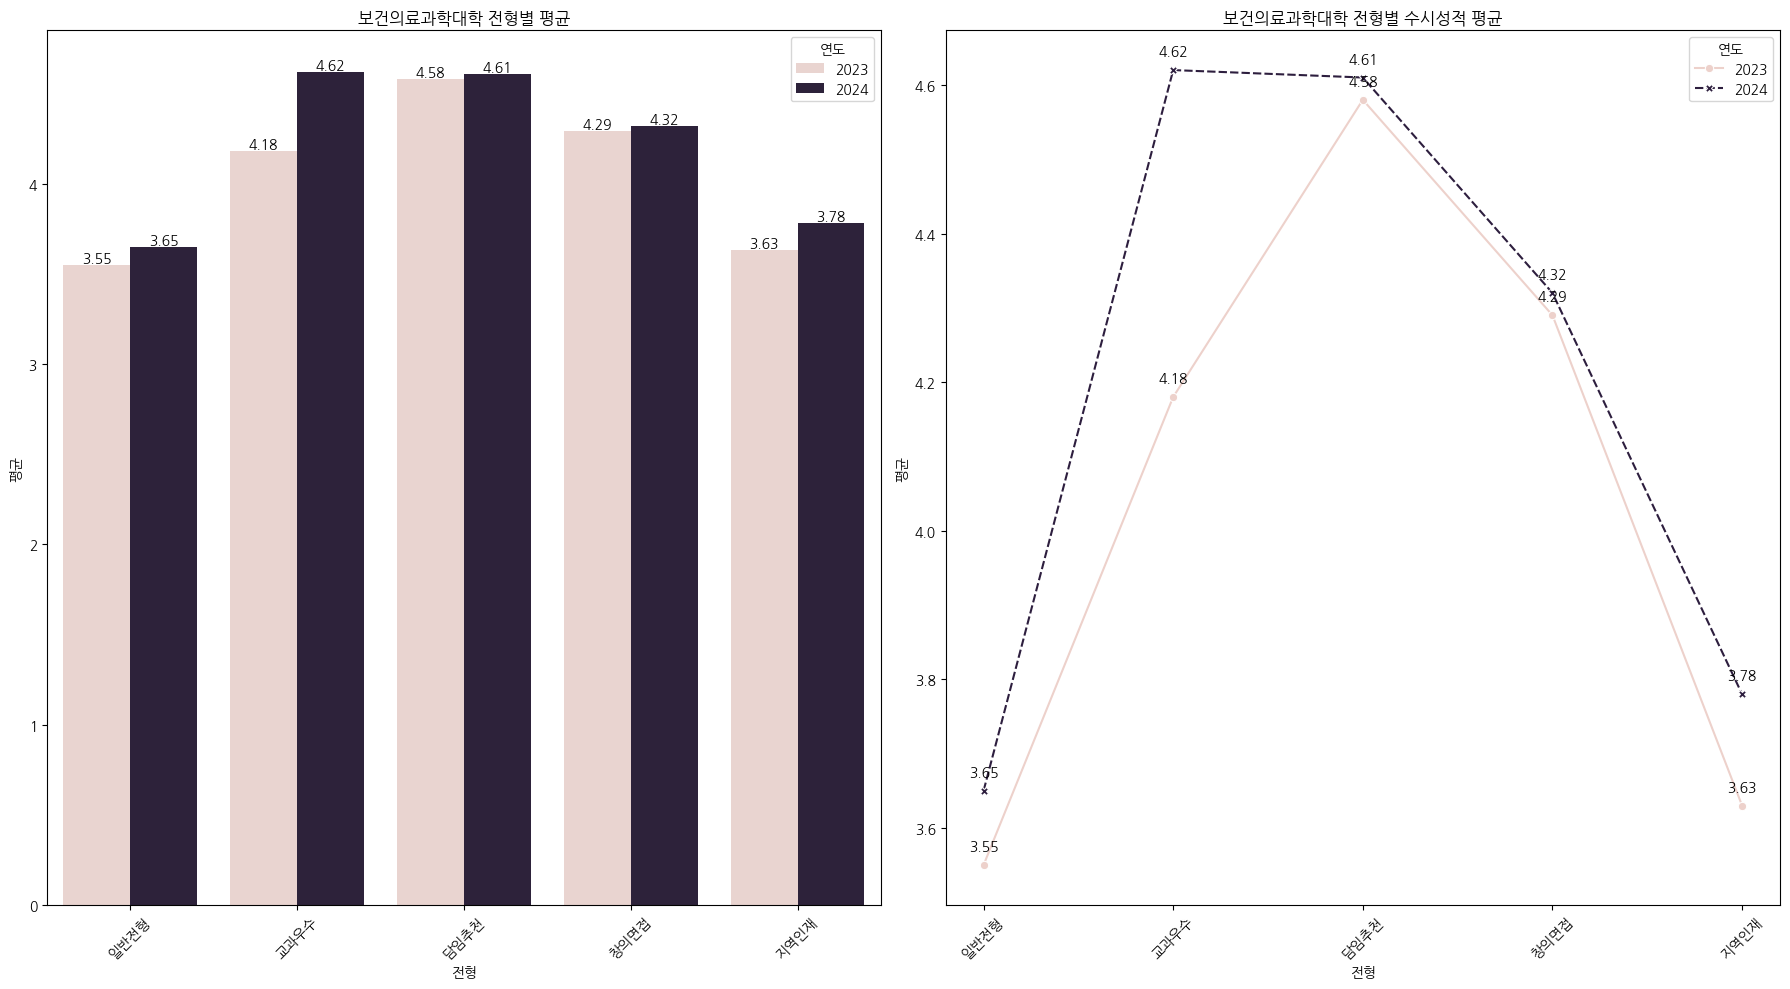

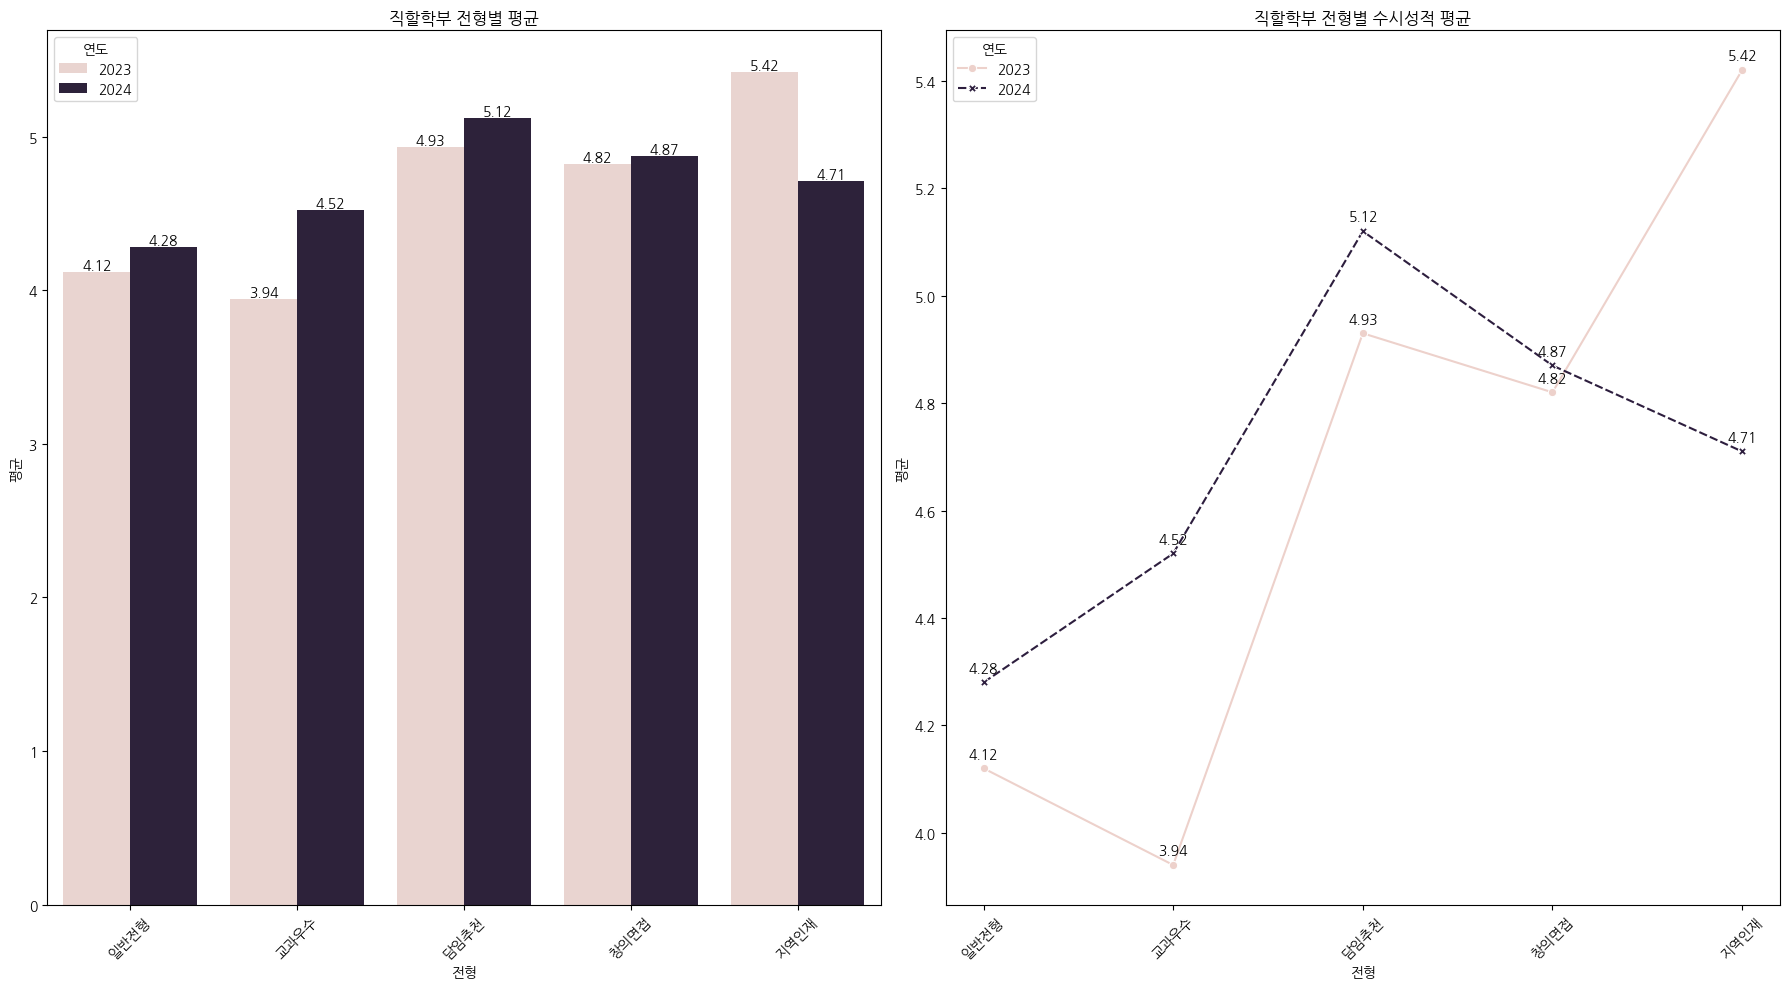

In [38]:
plt.rc('font', family='NanumGothic')

def visualize_department(target8, college):
    uu2 = pd.DataFrame({
        '연도': np.repeat([2023, 2024], 5),
        '전형': np.tile(np.repeat(['일반전형', '교과우수', '담임추천','창의면접', '지역인재'],1),2)
                      })


    # 모집 및 지원 데이터 매핑
    xx = dfs[dfs['대학'] == college][[
        '일반전형_평균','교과우수_평균',
        '담임추천_평균','창의면접_평균','지역인재_평균'
    ]].T

    uu2['평균'] = np.concatenate([xx.iloc[:, i].values for i in range(2)])
    # 3. 시각화
    fig, axes = plt.subplots(1, 2, figsize=(18, 10))

    # (1) 모집 및 지원 인원 막대 그래프
    sns.barplot(x='전형', y='평균', hue='연도', data=uu2, ax=axes[0])
    for container in axes[0].containers:
        axes[0].bar_label(container, fmt='%.2f', label_type='edge', fontsize=10)
    axes[0].set_title(f'{college} 전형별 평균')
    axes[0].set_xlabel('전형')
    # axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
    axes[0].set_xticks(range(len(uu2['전형'].unique())))
    axes[0].set_xticklabels(uu2['전형'].unique(), rotation=45)
    axes[0].set_ylabel('평균')

    # (2) 경쟁률 선 그래프
    sns.lineplot(x='전형', y='평균', hue='연도', data=uu2, style='연도', markers=True, ax=axes[1])
    for x, y in zip(uu2['전형'], uu2['평균']):
        axes[1].text(x, y+0.02, f'{y:.2f}', ha='center')
    axes[1].set_title(f'{college} 전형별 수시성적 평균')
    axes[1].set_xlabel('전형')
    # axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
    axes[1].set_xticks(range(len(uu2['전형'].unique())))
    axes[1].set_xticklabels(uu2['전형'].unique(), rotation=45)
    axes[1].set_ylabel('평균')

    plt.tight_layout()
    plt.show()

# 학과별 그래프 생성
for college in target11['대학'].unique():
    visualize_department(target11, college)


In [39]:
plt.rc('font', family='NanumGothic')

def visualize_department(target8, department):
    vv2 = pd.DataFrame({
        '연도': np.repeat([2023, 2024], 5),
        '전형': np.tile(np.repeat(['일반전형', '교과우수', '담임추천','창의면접', '지역인재'],1),2)
                      })


    # 모집 및 지원 데이터 매핑
    ww = target11[target11['학과'] == department][[
        '일반전형_평균','교과우수_평균',
        '담임추천_평균','창의면접_평균','지역인재_평균'
    ]].T

    vv2['평균'] = np.concatenate([ww.iloc[:, i].values for i in range(2)])

    # 3. 시각화
    fig, axes = plt.subplots(1, 2, figsize=(18, 8))

    # (1) 모집 및 지원 인원 막대 그래프
    sns.barplot(x='전형', y='평균', hue='연도', data=vv2, ax=axes[0])
    for container in axes[0].containers:
        axes[0].bar_label(container, fmt='%.2f', label_type='edge', fontsize=10)
    axes[0].set_title(f'{department} 평균')
    axes[0].set_xlabel('전형')
    # axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
    axes[0].set_xticks(range(len(vv2['전형'].unique())))
    axes[0].set_xticklabels(vv2['전형'].unique(), rotation=45)
    axes[0].set_ylabel('평균')

    sns.lineplot(x='전형', y='평균', hue='연도', data=vv2, style='연도', markers=True, ax=axes[1])
    for x, y in zip(vv2['전형'], vv2['평균']):
        axes[1].text(x, y+0.02, f'{y:.2f}', ha='center')
    axes[1].set_title(f'{department}별 수시성적 평균')
    axes[1].set_xlabel('전형')
    # axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
    axes[1].set_xticks(range(len(vv2['전형'].unique())))
    axes[1].set_xticklabels(vv2['전형'].unique(), rotation=45)
    axes[1].set_ylabel('평균')

    plt.tight_layout()
    plt.show()

# 학과별 그래프 생성
for department in target11['학과'].unique():
    visualize_department(target11, department)


Output hidden; open in https://colab.research.google.com to view.

## 학과별 모집 및 지원 경쟁률 수시성적 평균

In [40]:
plt.rc('font', family='NanumGothic')

def visualize_department(target8, department):
    fig, axes = plt.subplots(2, 2, figsize=(20, 10))

    hh2 = pd.DataFrame({
        '연도': np.repeat([2023, 2024, 2025], 18),
        '구분': np.tile(['모집', '지원'], 27),
        '전형': np.tile(np.repeat(['일반전형', '교과우수', '담임추천',
                                 '창의면접', '지역인재', '국가보훈/지역기회균형',
                                 '농어촌전형', '특성화고', '기회균형'], 2),3)
                      })

    aa = target8[target8['학과'] == department][[
        '일반전형_모집', '일반전형_지원',
        '교과우수_모집', '교과우수_지원',
        '담임추천_모집', '담임추천_지원',
        '창의면접_모집', '창의면접_지원',
        '지역인재_모집', '지역인재_지원',
        '국가보훈/지역기회균형_모집', '국가보훈/지역기회균형_지원',
        '농어촌전형_모집', '농어촌전형_지원',
        '특성화고_모집', '특성화고_지원',
        '기회균형_모집', '기회균형_지원'
    ]].T

    hh2['인원'] = np.concatenate([aa.iloc[:, i].values for i in range(3)])

    # (1) 지원 인원 막대 그래프
    hh2_지원 = hh2[hh2['구분']=='지원']
    sns.barplot(x='전형', y='인원', hue='연도', data=hh2_지원, ax=axes[0,0])
    for container in axes[0,0].containers:
        axes[0,0].bar_label(container, fmt='%.0f', label_type='edge', fontsize=10)
    axes[0,0].set_title(f'{department} 지원')
    axes[0,0].set_xlabel('전형')
    # axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
    axes[0,0].set_xticks(range(len(hh2['전형'].unique())))
    axes[0,0].set_xticklabels(hh2['전형'].unique(), rotation=45)
    axes[0,0].set_ylabel('인원')

    # (1) 지원 인원 막대 그래프
    hh2_모집 = hh2[hh2['구분']=='모집']
    sns.barplot(x='전형', y='인원', hue='연도', data=hh2_모집, ax=axes[0,1])
    for container in axes[0,1].containers:
        axes[0,1].bar_label(container, fmt='%.0f', label_type='edge', fontsize=10)
    axes[0,1].set_title(f'{department} 모집')
    axes[0,1].set_xlabel('전형')
    # axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
    axes[0,1].set_xticks(range(len(hh2['전형'].unique())))
    axes[0,1].set_xticklabels(hh2['전형'].unique(), rotation=45)
    axes[0,1].set_ylabel('인원')

    # (3) 경쟁률 선 그래프
    ii2 = pd.DataFrame({
        '연도': np.repeat([2023, 2024, 2025], 6),
        '전형': np.tile([
            '일반전형', '교과우수', '담임추천',
            '창의면접', '지역인재', '국가보훈/지역기회균형'], 3)
    })

    zz = target8[target8['학과'] == department][[
        '일반전형_경쟁률',
        '교과우수_경쟁률',
        '담임추천_경쟁률',
        '창의면접_경쟁률',
        '지역인재_경쟁률',
        '국가보훈/지역기회균형_경쟁률'
    ]].T

    ii2['경쟁률'] = np.concatenate([zz.iloc[:, i].values for i in range(3)])
    sns.lineplot(x='전형', y='경쟁률', hue='연도', data=ii2, style='연도', markers=True, ax=axes[1,0])
    for x, y in zip(ii2['전형'], ii2['경쟁률']):
        axes[1,0].text(x, y+0.02, f'{y:.2f}', ha='center')
    axes[1,0].set_title(f'{department} 경쟁률')
    axes[1,0].set_xlabel('전형')
    # axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
    axes[1,0].set_xticks(range(len(ii2['전형'].unique())))
    axes[1,0].set_xticklabels(ii2['전형'].unique(), rotation=45)
    axes[1,0].set_ylabel('경쟁률')


    # (4) 성적 선 그래프
    vv2 = pd.DataFrame({
        '연도': np.repeat([2023, 2024], 5),
        '전형': np.tile(np.repeat(['일반전형', '교과우수', '담임추천','창의면접', '지역인재'],1),2)
                      })

    ww = target11[target11['학과'] == department][[
        '일반전형_평균','교과우수_평균',
        '담임추천_평균','창의면접_평균','지역인재_평균'
    ]].T
    vv2['평균'] = np.concatenate([ww.iloc[:, i].values for i in range(2)])

    sns.lineplot(x='전형', y='평균', hue='연도', data=vv2, style='연도', markers=True, ax=axes[1,1])
    for x, y in zip(vv2['전형'], vv2['평균']):
        axes[1,1].text(x, y+0.02, f'{y:.2f}', ha='center')
    axes[1,1].set_title(f'{department}별 수시 성적 평균')
    axes[1,1].set_xlabel('전형')
    # axes[1,1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
    axes[1,1].set_xticks(range(len(vv2['전형'].unique())))
    axes[1,1].set_xticklabels(vv2['전형'].unique(), rotation=45)
    axes[1,1].set_ylabel('평균')

    plt.tight_layout()
    plt.show()

# 학과별 그래프 생성
for department in target8['학과'].unique():
    visualize_department(target8, department)


Output hidden; open in https://colab.research.google.com to view.

## 경쟁률과 성적간의 관계

In [41]:
rate_df = pd.concat([df3.iloc[:-9],df4.iloc[:-9]]).round(2)[['일반전형_경쟁률','교과우수_경쟁률','담임추천_경쟁률',
                      '창의면접_경쟁률','지역인재_경쟁률']].melt()
score_df = pd.concat([dfs3,dfs4]).round(2)[[
                      '일반전형_평균','교과우수_평균','담임추천_평균',
                      '창의면접_평균','지역인재_평균']].melt()
total_df = pd.concat([rate_df, score_df], axis=1)
total_df['연도'] = 2023
total_df.loc[len(total_df)/2: ,'연도'] = 2024
total_df.columns = ['전형1','경쟁률','전형2','평균','연도']
total_df = total_df[total_df['경쟁률'] != 0]

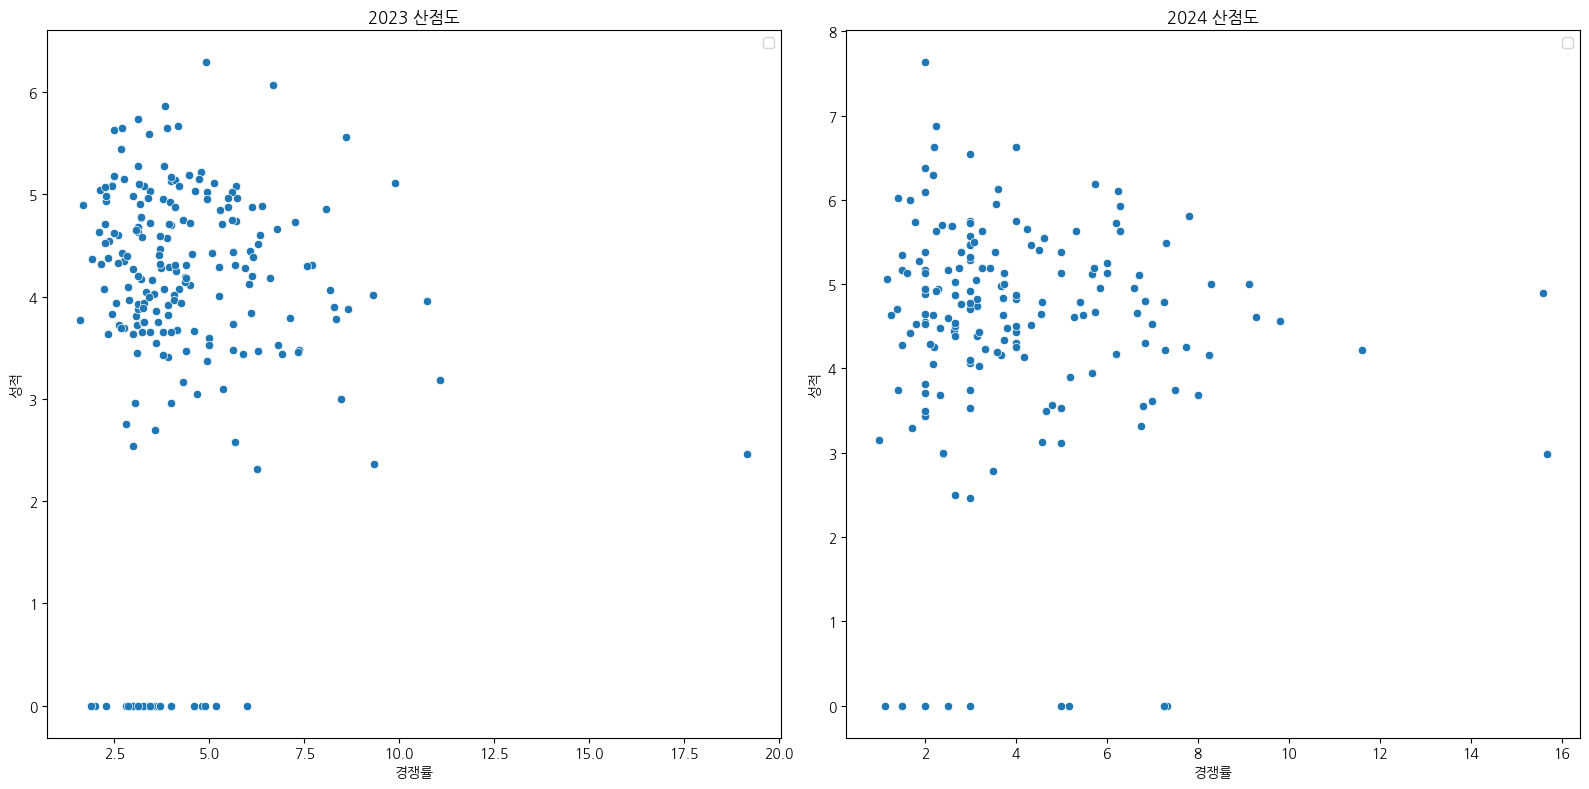

In [42]:
전형 = ['일반전형','교과우수','담임추천','창의면접','지역인재']

fig, ax = plt.subplots(1,len(total_df['연도'].unique()), figsize=(16, 8))
plt.subplots_adjust(wspace=0.4)

for i, year in enumerate(total_df['연도'].unique()):
    target = total_df[total_df['연도'] == year]
    sns.scatterplot(x=target['경쟁률'], y=target['평균'], ax=ax[i])

    ax[i].set_title(f'{year} 산점도')
    ax[i].set_xlabel('경쟁률')
    ax[i].set_ylabel('성적')
    ax[i].legend()

plt.tight_layout()
plt.show()

## 경쟁률과 수시성적 평균 상관분석
### 경쟁률과 수시 성적 평균이 서로 관련이 있는지 확인합니다.
경쟁률 관련 변수들끼리는 완벽한 음의 상관관계 (-1.0)을 가집니다. 예를 들어, 일반전형_경쟁률과 교과우수_경쟁률은 서로 반대로 변동합니다.
성적 관련 변수들끼리는 완벽한 양의 상관관계 (1.0)을 보입니다. 예를 들어, 일반전형_평균과 교과우수_평균은 함께 상승하거나 하락합니다.
경쟁률과 성적 변수들 간에는 완벽한 음의 상관관계 (-1.0)를 보이는 경우도 있습니다. 예를 들어, 일반전형_경쟁률과 지역인재_평균은 서로 반대로 변동합니다.

In [64]:
target13 = pd.concat([df3.iloc[:-9],df4.iloc[:-9]]).round(2)
target14 = pd.concat([dfs3,dfs4]).round(2)
target15 = target14[target14['학과'] != '평균']

In [76]:
for col in target13['학과'].unique():
   de = target13[target13['학과'] == col][['일반전형_경쟁률','교과우수_경쟁률',
                                         '담임추천_경쟁률','창의면접_경쟁률','지역인재_경쟁률','연도']]
   co = target15[target15['학과'] == col][['일반전형_평균','교과우수_평균',
                                         '담임추천_평균','창의면접_평균','지역인재_평균','연도']]

   corr_df = pd.concat([de, co], axis=1).reset_index(drop=True)
   corr_df.index = ['2023','2024']
   corr = corr_df.drop('연도',axis=1).corr().fillna(0)
   print(corr_df)

   plt.figure(figsize=(10, 8))
   plt.rc('font', family='NanumGothic')
   sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, linewidths=0.5)
   plt.title(f"{col} 상관관계 히트맵")
   plt.show()
   print("-" * 40)

Output hidden; open in https://colab.research.google.com to view.

 ## 모집 인원 및 지원자수와 경쟁률 간의 관계 분석
 ##### 정원내경쟁률을 종속변수로, 정원내모집 + 정원내지원 + 일반전형_모집 + 일반전형_지원 + ''교과우수_모집 + 교과우수_지원 + 담임추천_모집 + 담임추천_지원 + ''창의면접_모집 + 창의면접_지원 + 지역인재_모집 + 지역인재_지원'를 독립변수로 설정하여 회귀분석을 진행

In [ ]:
# 단과대학별 총합 이용
target15 = pd.concat([df3.iloc[:-9], df4.iloc[:-9],df5.iloc[:-9]]).round(2)

rate_df = pd.DataFrame(columns=['정원내모집','정원내지원',
                  '학과'])

for col in target15['학과'].unique():
  df_filter = target15[target15['학과'] == col]
  formula = ('정원내경쟁률 ~ 정원내모집 + 정원내지원')
  model = ols(formula, data=df_filter).fit()
  params = model.params
  new = {
        '정원내모집': params.get('정원내모집', None),
        '정원내지원': params.get('정원내지원', None),
        '학과': col
    }
  rate_df = pd.concat([rate_df, pd.DataFrame([new])], ignore_index=True)
display(rate_df)

rate_df = rate_df.apply(pd.to_numeric, errors='coerce')
rate_max_df = pd.DataFrame(rate_df.idxmax(axis=1))
rate_max_df.columns = ['갯수']
print('학과별 최대 회귀계수 \n', rate_max_df.value_counts())

In [ ]:
# 단과대학별 총합 이용
target15 = pd.concat([df3.tail(6),df4.tail(6),df5.tail(6)]).round(2)

rate_df = pd.DataFrame(columns=['정원내모집','정원내지원',
                  '일반전형_모집','일반전형_지원',
                  '교과우수_모집','교과우수_지원',
                  '담임추천_모집','담임추천_지원',
                  '창의면접_모집','창의면접_지원',
                  '지역인재_모집','지역인재_지원','학과'])

for col in target15['학과'].unique():
  df_filter = target15[target15['학과'] == col]
  formula = ('정원내경쟁률 ~ 정원내모집 + 정원내지원 + 일반전형_모집 + 일반전형_지원 + '
               '교과우수_모집 + 교과우수_지원 + 담임추천_모집 + 담임추천_지원 + '
               '창의면접_모집 + 창의면접_지원 + 지역인재_모집 + 지역인재_지원')
  model = ols(formula, data=df_filter).fit()
  params = model.params
  new = {
        '정원내모집': params.get('정원내모집', None),
        '정원내지원': params.get('정원내지원', None),
        '일반전형_모집': params.get('일반전형_모집', None),
        '일반전형_지원': params.get('일반전형_지원', None),
        '교과우수_모집': params.get('교과우수_모집', None),
        '교과우수_지원': params.get('교과우수_지원', None),
        '담임추천_모집': params.get('담임추천_모집', None),
        '담임추천_지원': params.get('담임추천_지원', None),
        '창의면접_모집': params.get('창의면접_모집', None),
        '창의면접_지원': params.get('창의면접_지원', None),
        '지역인재_모집': params.get('지역인재_모집', None),
        '지역인재_지원': params.get('지역인재_지원', None),
        '학과': col
    }
  rate_df = pd.concat([rate_df, pd.DataFrame([new])], ignore_index=True)
display(rate_df)

rate_df = rate_df.apply(pd.to_numeric, errors='coerce')
rate_max_df = pd.DataFrame(rate_df.idxmax(axis=1))
rate_max_df.columns = ['갯수']
print('단과대학별 최대 회귀계수 \n', rate_max_df.value_counts())

In [ ]:
# 각 학과별 데이터 이용
target15 = pd.concat([df3.iloc[:-9],df4.iloc[:-9],df5.iloc[:-9]]).round(2)

rate_df = pd.DataFrame(columns=['정원내모집','정원내지원',
                  '일반전형_모집','일반전형_지원',
                  '교과우수_모집','교과우수_지원',
                  '담임추천_모집','담임추천_지원',
                  '창의면접_모집','창의면접_지원',
                  '지역인재_모집','지역인재_지원','학과'])

for col in target15['학과'].unique():
  df_filter = target15[target15['학과'] == col]
  formula = ('정원내경쟁률 ~ 정원내모집 + 정원내지원 + 일반전형_모집 + 일반전형_지원 + '
               '교과우수_모집 + 교과우수_지원 + 담임추천_모집 + 담임추천_지원 + '
               '창의면접_모집 + 창의면접_지원 + 지역인재_모집 + 지역인재_지원')
  model = ols(formula, data=df_filter).fit()
  params = model.params
  new = {
        '정원내모집': params.get('정원내모집', None),
        '정원내지원': params.get('정원내지원', None),
        '일반전형_모집': params.get('일반전형_모집', None),
        '일반전형_지원': params.get('일반전형_지원', None),
        '교과우수_모집': params.get('교과우수_모집', None),
        '교과우수_지원': params.get('교과우수_지원', None),
        '담임추천_모집': params.get('담임추천_모집', None),
        '담임추천_지원': params.get('담임추천_지원', None),
        '창의면접_모집': params.get('창의면접_모집', None),
        '창의면접_지원': params.get('창의면접_지원', None),
        '지역인재_모집': params.get('지역인재_모집', None),
        '지역인재_지원': params.get('지역인재_지원', None),
        '학과': col
    }
  rate_df = pd.concat([rate_df, pd.DataFrame([new])], ignore_index=True)
display(rate_df)

rate_df = rate_df.apply(pd.to_numeric, errors='coerce')
rate_max_df = pd.DataFrame(rate_df.idxmax(axis=1))
rate_max_df.columns = ['갯수']
print('학과별 전체 최대 회귀계수 \n', rate_max_df.value_counts())


In [ ]:
print(model.summary())

## 모집 인원과 지원자 수의 차이 검정
### 모집 인원과 지원자 수의 차이가 통계적으로 유의한지를 검정합니다.

H0: 모집 인원이 적을수록 경쟁률은 유의미하게 높아진다.
H1: 특정 학과의 수시 성적 평균은 다른 학과와 유의미하게 다르다.
가설 검정에 따라 T-test, ANOVA, 카이제곱 검정 등을 활용합니다.

In [ ]:
target16 = pd.concat([df3.tail(6),df4.tail(6),df5.tail(6)]).round(2)


print('2023년 정원내모집 정규성 검정 \n', shapiro(target16[target16['연도'] == '2023']['정원내모집']))
print('2024년 정원내모집 정규성 검정 \n', shapiro(target16[target16['연도'] == '2024']['정원내모집']))
print('2025년 정원내모집 정규성 검정 \n', shapiro(target16[target16['연도'] == '2025']['정원내모집']))
print()
print('2023년 정원내지원 정규성 검정 \n', shapiro(target16[target16['연도'] == '2023']['정원내지원']))
print('2024년 정원내지원 정규성 검정 \n', shapiro(target16[target16['연도'] == '2024']['정원내지원']))
print('2025년 정원내지원 정규성 검정 \n', shapiro(target16[target16['연도'] == '2025']['정원내지원']))
print()
result3 = ttest_rel(target16[target16['연도'] == '2023']['정원내모집'],
                   target16[target16['연도'] == '2023']['정원내지원'])
result4 = ttest_rel(target16[target16['연도'] == '2024']['정원내모집'],
                   target16[target16['연도'] == '2024']['정원내지원'])
result5 = ttest_rel(target16[target16['연도'] == '2025']['정원내모집'],
                   target16[target16['연도'] == '2025']['정원내지원'])
print('2023년 t-검정 \n', result3)
print('2024년 t-검정 \n', result3)
print('2025년 t-검정 \n', result5)

# 정원내모집과 정원내지원의 평균에 유의미한 차이가 있다

## 단과대학 및 학과 간 수시 성적 평균의 차이 검정
### 여러 학과의 수시 성적 평균이 통계적으로 차이가 있는지 검정합니다

### 정규성 가정 만족 시: One-Way ANOVA
### 정규성 가정 불만족 시: Kruskal-Wallis 검정 (비모수 검정)

H0: 모집 인원이 적을수록 경쟁률은 유의미하게 높아진다.
H1: 특정 학과의 수시 성적 평균은 다른 학과와 유의미하게 다르다.
귀무가설 기각 유의미하게 다름

In [ ]:
target17 = pd.concat([dfs3,dfs4]).round(2)

gr1 = target17['일반전형_평균']
gr2 = target17['교과우수_평균']
gr3 = target17['담임추천_평균']
gr4 = target17['창의면접_평균']
gr5 = target17['지역인재_평균']

print('일반전형_평균 정규성검정 \n', shapiro(gr1))
print('교과우수_평균 정규성검정 \n',shapiro(gr2))
print('담임추천_평균 정규성검정 \n',shapiro(gr3))
print('창의면접_평균 정규성검정 \n',shapiro(gr4))
print('지역인재_평균 정규성검정 \n',shapiro(gr5))
print('4개의 전형이 정규성을 만족하지 않아 비모수 검정 수행')
print()
print('등분산검정 \n',levene(gr1,gr2,gr3,gr4,gr5))
print()
# 정규성 만족하지않음 비모수검정 진행

f_statistic, pvalue = f_oneway(gr1, gr2, gr3,gr4,gr5)
print('이원분산분석 \n',f_statistic,',', 'pvalue=',pvalue)
print()
print('비모수검정 \n',kruskal(gr1, gr2, gr3,gr4,gr5))

#  그룹 간 중앙값에 유의미한 차이가 있음

## 군집분석 (Clustering)
목적: 학과 또는 학생 그룹을 유사한 특성을 가진 그룹으로 나눕니다.
활용 변수: 수시 성적 평균, 경쟁률, 모집 인원, 지원자 수 등
방법: K-Means 클러스터링, 계층적 군집 분석
예시 분석:
학과 그룹화: 학과를 경쟁률, 지원자 수, 평균 성적을 기준으로 유사 그룹으로 나눠서 "인기 학과 그룹", "성적 상위 학과 그룹" 등을 도출합니다.
지원자 유형 군집화: 학생들의 성적, 지원 학과, 지원 패턴 등을 바탕으로 지원자 유형을 그룹화합니다.

In [100]:
rate = pd.concat([df3.iloc[:-9],df4.iloc[:-9]]).reset_index(drop=True)
rate.연도 = rate.연도.astype('int')
score = pd.concat([dfs3,dfs4]).reset_index(drop=True)

total = pd.merge(rate, score, on=['학과','연도'], how='inner')

classs = {
    '비즈니스대학': 1,
    '인문사회대학': 2,
    '공과대학': 3,
    '사범대학': 4,
    '보건의료과학대학': 5,
    '직할학부': 6
    }
total['분류'] = total['단과대학'].map(classs)

total2 = total.copy()
# print(total2.columns)
total2 = total2.drop(['단과대학','대학','학과','연도','분류','정원내모집','모집정원',
                      '일반전형_모집','교과우수_모집','창의면접_모집','담임추천_모집','지역인재_모집',
                      '국가보훈/지역기회균형_모집','농어촌전형_모집','기회균형_모집','특성화고_모집',
                      '국가보훈/지역기회균형_지원', '국가보훈/지역기회균형_경쟁률', '농어촌전형_지원', '특성화고_지원', '기회균형_지원'], axis=1).round(2)
print(total2.columns)

Index(['정원내지원', '정원내경쟁률', '일반전형_지원', '일반전형_경쟁률', '교과우수_지원', '교과우수_경쟁률',
       '담임추천_지원', '담임추천_경쟁률', '창의면접_지원', '창의면접_경쟁률', '지역인재_지원', '지역인재_경쟁률',
       '일반전형_평균', '교과우수_평균', '담임추천_평균', '창의면접_평균', '지역인재_평균'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:105: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  scout = method(scout_x, scout_y, **kws)
/usr/local/lib/python3.10/dist-packages/seaborn/relational.py:438: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(x=x, y=y, **kws)


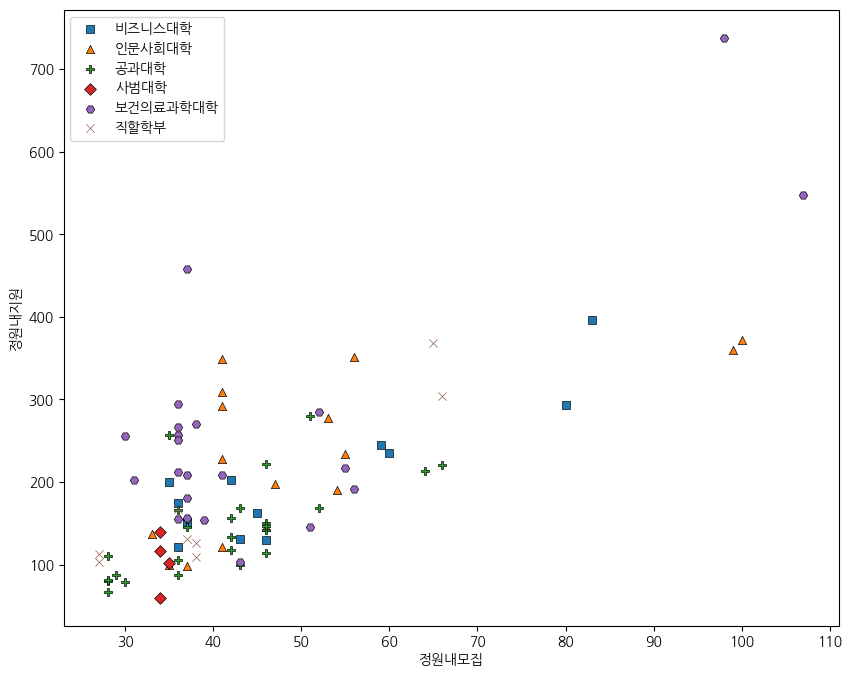

In [99]:
markers=['o', 's', '^', 'P','D','H','x']
target_list = np.unique(total['분류'])

plt.figure(figsize=(10, 8))

for target in target_list:
    target_cluster = total[total['분류']==target]
    sns.scatterplot(x=target_cluster['정원내모집'], y=target_cluster['정원내지원'],
                edgecolor='k', marker=markers[target])

plt.rc('font', family='NanumGothic')
plt.legend(labels=['비즈니스대학','인문사회대학',
                   '공과대학','사범대학','보건의료과학대학','직할학부'])
plt.show()

In [88]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300,random_state=810)
kmeans.fit(total2)
#cluster_labels = kmeans.fit_predict(total2)
total['군집'] = kmeans.labels_

In [89]:
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(total2)

total['pca_x'] = pca_transformed[:,0]
total['pca_y'] = pca_transformed[:,1]

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


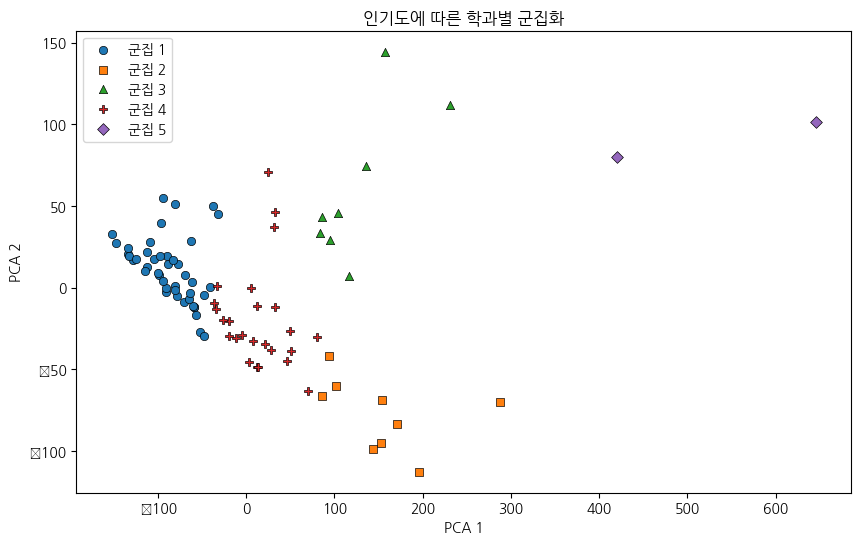

In [90]:
centers = kmeans.cluster_centers_
unique_labels = np.unique(total['군집'])
markers = ['o', 's', '^', 'P', 'D', 'H', 'x']

plt.figure(figsize=(10, 6))
plt.rcParams['axes.unicode_minus'] = True

for label in unique_labels:
    label_cluster = total[total['군집']==label]
    sns.scatterplot(x=label_cluster['pca_x'], y=label_cluster['pca_y'], edgecolor='k',
                marker=markers[label])

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('인기도에 따른 학과별 군집화')
plt.legend(labels=['군집 1','군집 2','군집 3','군집 4','군집 5'])
plt.show()

In [97]:
cluster = total.groupby(['연도','단과대학','군집'])['정원내경쟁률'].mean(numeric_only=True).round(2)
print(cluster)

연도    단과대학      군집
2023  공과대학      0      2.85
                3      5.25
      보건의료과학대학  0      3.35
                2      7.35
                3      5.60
                4      7.53
      비즈니스대학    0      3.27
                1      4.77
                3      4.39
      사범대학      0      3.50
      인문사회대학    0      2.82
                1      6.38
                3      3.88
      직할학부      0      3.86
                2      4.61
                3      4.64
2024  공과대학      0      3.48
                3      3.29
      보건의료과학대학  0      3.68
                1     12.38
                2      7.11
                3      5.12
                4      5.11
      비즈니스대학    0      3.56
                1      3.66
                3      4.89
      사범대학      0      2.60
      인문사회대학    0      3.39
                1      5.63
                3      5.01
      직할학부      0      3.33
                2      5.66
Name: 정원내경쟁률, dtype: float64


In [101]:
# pca = PCA(n_components=3)
# pca_transformed = pca.fit_transform(total2)

# total['pca_x'] = pca_transformed[:,0]
# total['pca_y'] = pca_transformed[:,1]
# total['pca_z'] = pca_transformed[:,2]

# fig = plt.figure(figsize=(8, 8))
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(total['pca_x'], total['pca_y'], total['pca_z'], c=total['분류'], cmap='plasma', s=50, alpha=0.7)

# ax.set_xlabel('PC1')
# ax.set_ylabel('PC2')
# ax.set_zlabel('PC3')
# ax.set_title('3D PCA 시각화')

# plt.show()

## 학과별 경쟁률의 차이 검정
##### 특정 학과 그룹 간 경쟁률에 차이가 있는지 확인합니다.
##### 인기 학과(예: 의학, 법학)와 비인기 학과의 경쟁률이 통계적으로 차이가 있는가?
##### 사용 통계 방법:
##### 두 그룹 비교 시: 독립표본 t-검정
##### 세 그룹 이상 비교 시: ANOVA (정규성 불만족 시 비모수 검정 적용)

## markdown 및 html 파일로 저장

In [102]:
!jupyter nbconvert --to markdown "/content/drive/MyDrive/통계모델링/11.27.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/통계모델링/11.27.ipynb to markdown
[NbConvertApp] Support files will be in 11.27_files/
[NbConvertApp] Writing 62314 bytes to /content/drive/MyDrive/통계모델링/11.27.md


In [103]:
!jupyter nbconvert --to html "/content/drive/MyDrive/통계모델링/11.27.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/통계모델링/11.27.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 20 image(s).
[NbConvertApp] Writing 2820198 bytes to /content/drive/MyDrive/통계모델링/11.27.html
